# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:15:07.482042: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:15:10.411031
2025-04-14 19:15:10.411031


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:15:04"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

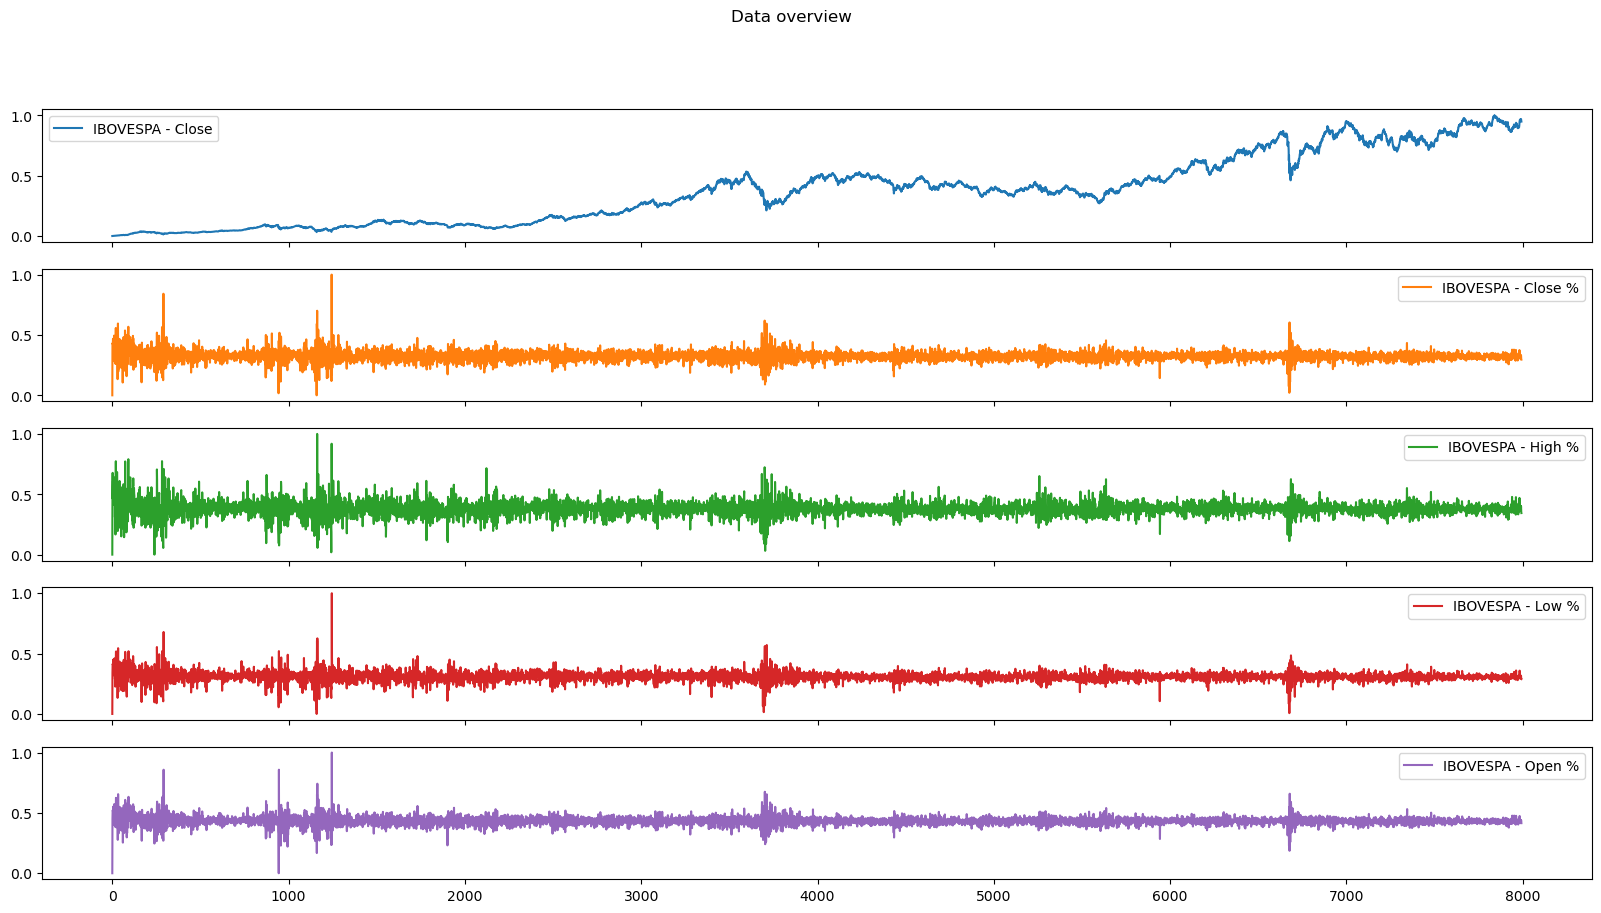

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

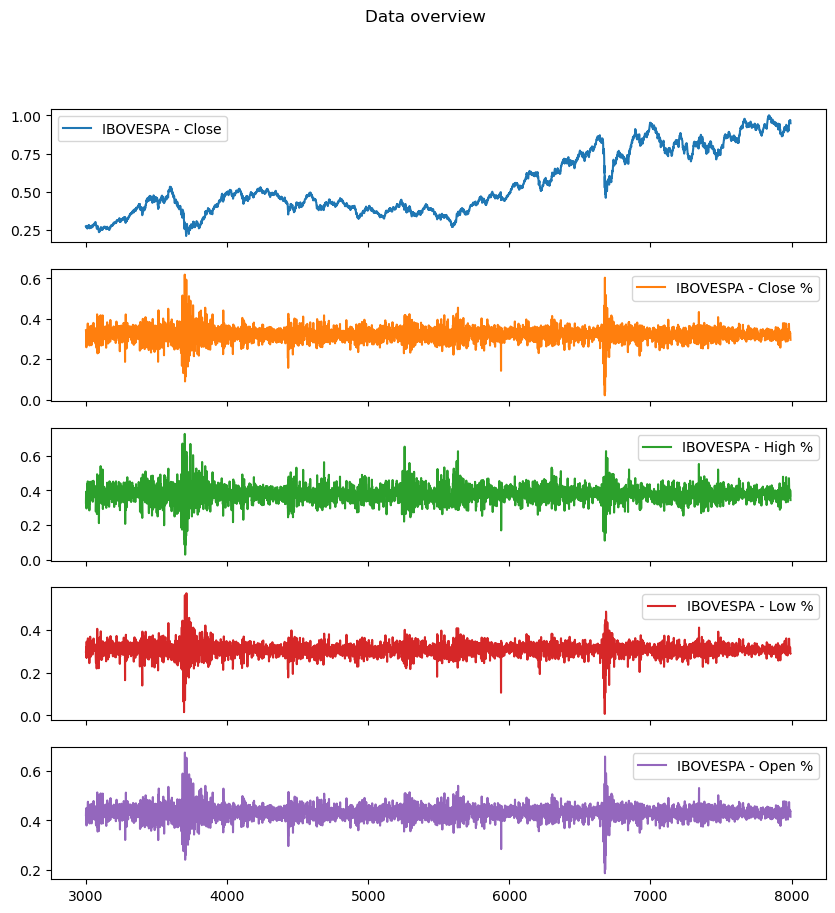

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

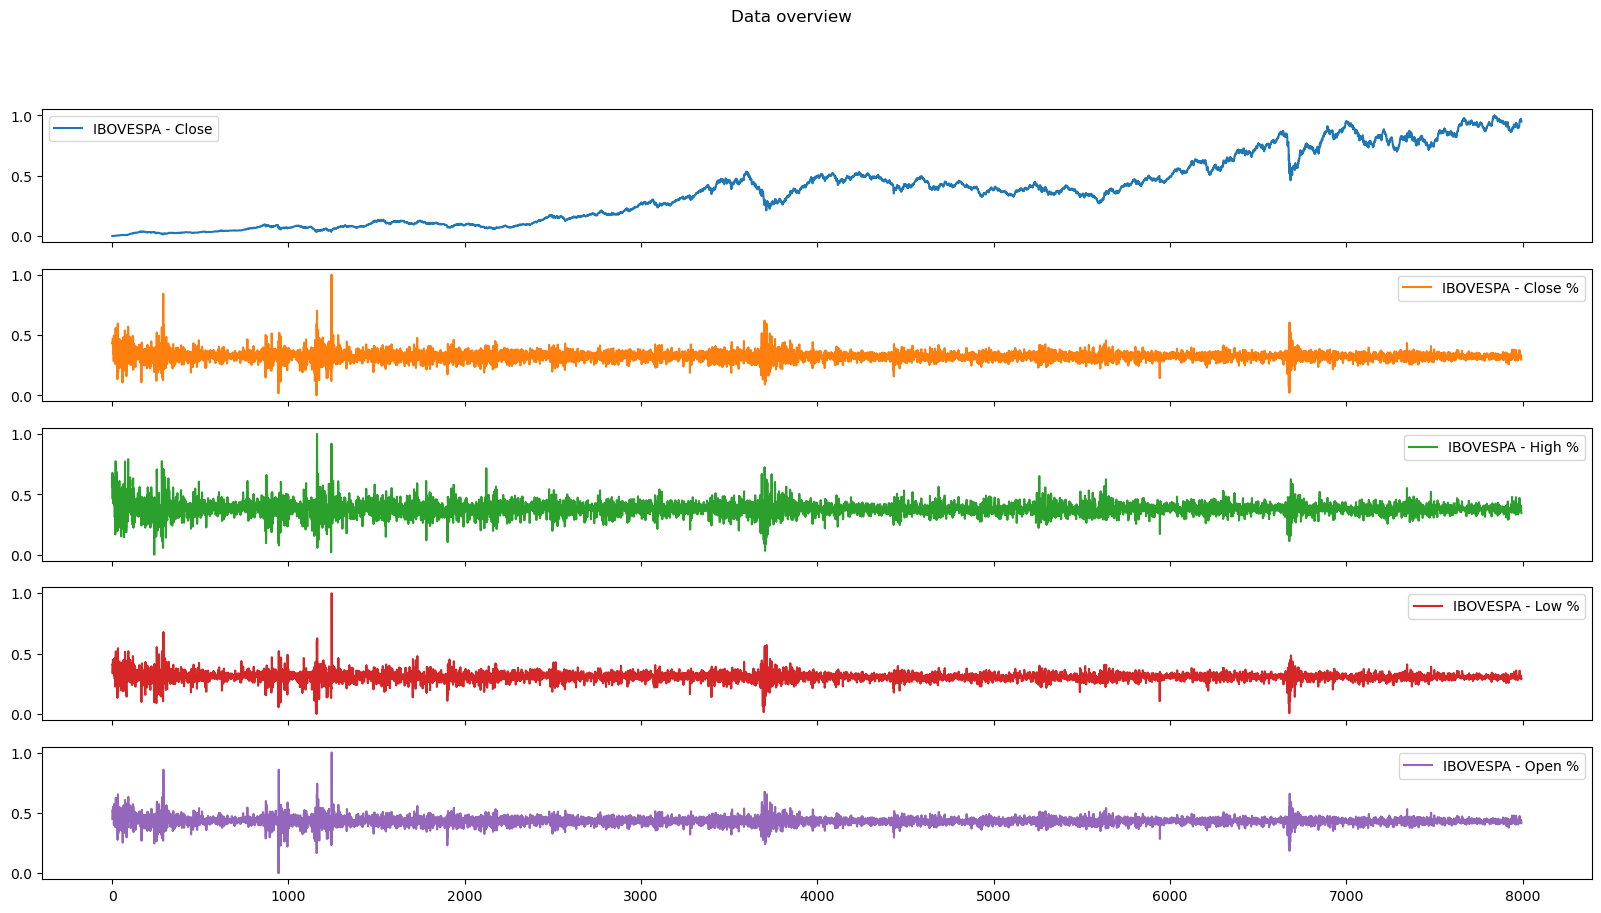

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

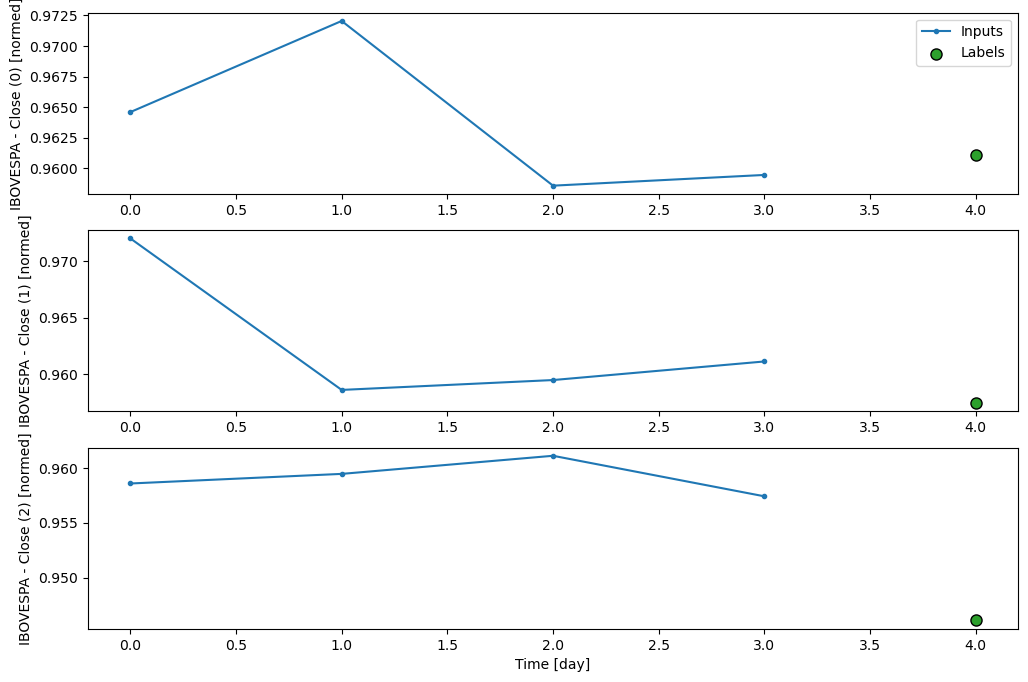

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

5

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 18:55 5s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 90.3391 - mean_squared_error: 4.4783e-05 - root_mean_squared_error: 0.0065  

  8/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 78.7300 - mean_squared_error: 6.9328e-05 - root_mean_squared_error: 0.0079

 11/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 74.4193 - mean_squared_error: 9.7602e-05 - root_mean_squared_error: 0.0093

 13/238 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 71.7446 - mean_squared_error: 1.0617e-04 - root_mean_squared_error: 0.0098

 16/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 67.8296 - mean_squared_error: 1.1153e-04 - root_mean_squared_error: 0.0101

 20/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 62.9776 - mean_squared_error: 1.1201e-04 - root_mean_squared_error: 0.0102

 25/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 57.7828 - mean_squared_error: 1.0903e-04 - root_mean_squared_error: 0.0102

 29/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 54.4242 - mean_squared_error: 1.0902e-04 - root_mean_squared_error: 0.0102

 31/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 53.0561 - mean_squared_error: 1.1246e-04 - root_mean_squared_error: 0.0104

 33/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 51.8339 - mean_squared_error: 1.1670e-04 - root_mean_squared_error: 0.0106

 35/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 50.6597 - mean_squared_error: 1.1992e-04 - root_mean_squared_error: 0.0107

 40/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 48.1529 - mean_squared_error: 1.2692e-04 - root_mean_squared_error: 0.0110

 44/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 46.5928 - mean_squared_error: 1.3706e-04 - root_mean_squared_error: 0.0114

 49/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.0531 - mean_squared_error: 1.5811e-04 - root_mean_squared_error: 0.0121

 53/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 43.9605 - mean_squared_error: 1.7574e-04 - root_mean_squared_error: 0.0127

 59/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.4354 - mean_squared_error: 1.9641e-04 - root_mean_squared_error: 0.0134

 65/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 41.0635 - mean_squared_error: 2.1228e-04 - root_mean_squared_error: 0.0139

 70/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 40.0074 - mean_squared_error: 2.2195e-04 - root_mean_squared_error: 0.0143

 78/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 38.5768 - mean_squared_error: 2.3660e-04 - root_mean_squared_error: 0.0148

 85/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 37.4905 - mean_squared_error: 2.5084e-04 - root_mean_squared_error: 0.0152

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 36.4818 - mean_squared_error: 2.6318e-04 - root_mean_squared_error: 0.0156

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 35.6839 - mean_squared_error: 2.7574e-04 - root_mean_squared_error: 0.0160

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 34.8341 - mean_squared_error: 2.9635e-04 - root_mean_squared_error: 0.0165

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 33.9570 - mean_squared_error: 3.3694e-04 - root_mean_squared_error: 0.0174

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 33.4538 - mean_squared_error: 3.6982e-04 - root_mean_squared_error: 0.0181

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 33.1716 - mean_squared_error: 3.9186e-04 - root_mean_squared_error: 0.0185

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 32.9938 - mean_squared_error: 4.1039e-04 - root_mean_squared_error: 0.0189

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 32.9090 - mean_squared_error: 4.2282e-04 - root_mean_squared_error: 0.0191

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 32.7481 - mean_squared_error: 4.5652e-04 - root_mean_squared_error: 0.0196

128/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 32.5976 - mean_squared_error: 5.0071e-04 - root_mean_squared_error: 0.0202

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 32.4554 - mean_squared_error: 5.5074e-04 - root_mean_squared_error: 0.0208

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 32.3870 - mean_squared_error: 5.7730e-04 - root_mean_squared_error: 0.0211

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 32.3201 - mean_squared_error: 6.0496e-04 - root_mean_squared_error: 0.0215

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 32.2548 - mean_squared_error: 6.3339e-04 - root_mean_squared_error: 0.0218

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 32.1904 - mean_squared_error: 6.6201e-04 - root_mean_squared_error: 0.0221

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 32.0626 - mean_squared_error: 7.1787e-04 - root_mean_squared_error: 0.0228

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 31.9373 - mean_squared_error: 7.7305e-04 - root_mean_squared_error: 0.0234

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 31.8774 - mean_squared_error: 8.0195e-04 - root_mean_squared_error: 0.0238

140/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 31.8192 - mean_squared_error: 8.3148e-04 - root_mean_squared_error: 0.0241

144/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 31.5908 - mean_squared_error: 9.4590e-04 - root_mean_squared_error: 0.0254

147/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 31.4192 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0263    

149/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 31.3044 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0269

151/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 31.1893 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0274

154/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 31.0171 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0282

158/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 30.7924 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0292

162/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 30.5696 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0302

166/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 30.3531 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0310

172/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 30.0338 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0323

174/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 29.9296 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0327

176/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 29.8285 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0331

180/238 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 29.6282 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0338

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 29.4334 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0345

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 29.2456 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0352

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 29.0649 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0358

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 28.8023 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0368

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 28.5407 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0377

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 28.2833 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0386

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 27.9996 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0397

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 27.7292 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0408

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 27.5389 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0415

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 27.3505 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0422

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 27.2018 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0428


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 27.1653 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0429 - val_loss: 0.1695 - val_mean_absolute_error: 0.1695 - val_mean_absolute_percentage_error: 18.1888 - val_mean_squared_error: 0.0303 - val_root_mean_squared_error: 0.1740


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7497 - mean_absolute_error: 0.7497 - mean_absolute_percentage_error: 32320.4609 - mean_squared_error: 0.5620 - root_mean_squared_error: 0.7497

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7205 - mean_absolute_error: 0.7205 - mean_absolute_percentage_error: 13574.1758 - mean_squared_error: 0.5207 - root_mean_squared_error: 0.7212 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6683 - mean_absolute_error: 0.6683 - mean_absolute_percentage_error: 9617.2158 - mean_squared_error: 0.4579 - root_mean_squared_error: 0.6743 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5947 - mean_absolute_error: 0.5947 - mean_absolute_percentage_error: 7468.6406 - mean_squared_error: 0.3895 - root_mean_squared_error: 0.6171

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5374 - mean_absolute_error: 0.5374 - mean_absolute_percentage_error: 6283.2148 - mean_squared_error: 0.3420 - root_mean_squared_error: 0.5739

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4856 - mean_absolute_error: 0.4856 - mean_absolute_percentage_error: 5379.2554 - mean_squared_error: 0.3017 - root_mean_squared_error: 0.5345

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4475 - mean_absolute_error: 0.4475 - mean_absolute_percentage_error: 4782.6143 - mean_squared_error: 0.2733 - root_mean_squared_error: 0.5053

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4188 - mean_absolute_error: 0.4188 - mean_absolute_percentage_error: 4364.0635 - mean_squared_error: 0.2526 - root_mean_squared_error: 0.4830

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3911 - mean_absolute_error: 0.3911 - mean_absolute_percentage_error: 3981.3521 - mean_squared_error: 0.2331 - root_mean_squared_error: 0.4612

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3675 - mean_absolute_error: 0.3675 - mean_absolute_percentage_error: 3666.8855 - mean_squared_error: 0.2168 - root_mean_squared_error: 0.4423

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3468 - mean_absolute_error: 0.3468 - mean_absolute_percentage_error: 3403.2009 - mean_squared_error: 0.2028 - root_mean_squared_error: 0.4256

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3289 - mean_absolute_error: 0.3289 - mean_absolute_percentage_error: 3178.5740 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4107

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3131 - mean_absolute_error: 0.3131 - mean_absolute_percentage_error: 2984.6582 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3974

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 2815.4043 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3855

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2875 - mean_absolute_error: 0.2875 - mean_absolute_percentage_error: 2666.3147 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3747

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 2533.7551 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3649

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 2415.0500 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3559

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 2308.0620 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3476

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2500 - mean_absolute_error: 0.2500 - mean_absolute_percentage_error: 2211.0696 - mean_squared_error: 0.1371 - root_mean_squared_error: 0.3398

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2425 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 2122.6975 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3326

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 2041.8088 - mean_squared_error: 0.1275 - root_mean_squared_error: 0.3259

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1967.4755 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3196

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1898.9194 - mean_squared_error: 0.1193 - root_mean_squared_error: 0.3138

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1835.4708 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3084

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2147 - mean_absolute_error: 0.2147 - mean_absolute_percentage_error: 1789.2772 - mean_squared_error: 0.1131 - root_mean_squared_error: 0.3044

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1745.5817 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.3007

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 1704.1842 - mean_squared_error: 0.1083 - root_mean_squared_error: 0.2971

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 1659.4514 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.2932


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 1654.0509 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.2927 - val_loss: 0.1443 - val_mean_absolute_error: 0.1443 - val_mean_absolute_percentage_error: 15.4501 - val_mean_squared_error: 0.0223 - val_root_mean_squared_error: 0.1493


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.7423 - mean_absolute_error: 0.7423 - mean_absolute_percentage_error: 32016.7617 - mean_squared_error: 0.5510 - root_mean_squared_error: 0.7423

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.7388 - mean_absolute_error: 0.7388 - mean_absolute_percentage_error: 17416.5273 - mean_squared_error: 0.5459 - root_mean_squared_error: 0.7388 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.7296 - mean_absolute_error: 0.7296 - mean_absolute_percentage_error: 12895.4766 - mean_squared_error: 0.5327 - root_mean_squared_error: 0.7298

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.7160 - mean_absolute_error: 0.7160 - mean_absolute_percentage_error: 10306.4199 - mean_squared_error: 0.5138 - root_mean_squared_error: 0.7165

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.7029 - mean_absolute_error: 0.7029 - mean_absolute_percentage_error: 8979.0674 - mean_squared_error: 0.4966 - root_mean_squared_error: 0.7041 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6889 - mean_absolute_error: 0.6889 - mean_absolute_percentage_error: 8014.5986 - mean_squared_error: 0.4789 - root_mean_squared_error: 0.6909

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6675 - mean_absolute_error: 0.6675 - mean_absolute_percentage_error: 7012.8613 - mean_squared_error: 0.4536 - root_mean_squared_error: 0.6715

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6458 - mean_absolute_error: 0.6458 - mean_absolute_percentage_error: 6359.6157 - mean_squared_error: 0.4313 - root_mean_squared_error: 0.6536

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6340 - mean_absolute_error: 0.6340 - mean_absolute_percentage_error: 6082.5127 - mean_squared_error: 0.4203 - root_mean_squared_error: 0.6445

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6145 - mean_absolute_error: 0.6145 - mean_absolute_percentage_error: 5677.5088 - mean_squared_error: 0.4027 - root_mean_squared_error: 0.6295

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5989 - mean_absolute_error: 0.5989 - mean_absolute_percentage_error: 5394.7788 - mean_squared_error: 0.3893 - root_mean_squared_error: 0.6179

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5797 - mean_absolute_error: 0.5797 - mean_absolute_percentage_error: 5083.0112 - mean_squared_error: 0.3736 - root_mean_squared_error: 0.6040

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5611 - mean_absolute_error: 0.5611 - mean_absolute_percentage_error: 4809.2368 - mean_squared_error: 0.3590 - root_mean_squared_error: 0.5907

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5434 - mean_absolute_error: 0.5434 - mean_absolute_percentage_error: 4566.7515 - mean_squared_error: 0.3455 - root_mean_squared_error: 0.5781

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5203 - mean_absolute_error: 0.5203 - mean_absolute_percentage_error: 4270.2202 - mean_squared_error: 0.3283 - root_mean_squared_error: 0.5616

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4991 - mean_absolute_error: 0.4991 - mean_absolute_percentage_error: 4014.0261 - mean_squared_error: 0.3128 - root_mean_squared_error: 0.5464

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4824 - mean_absolute_error: 0.4824 - mean_absolute_percentage_error: 3820.4270 - mean_squared_error: 0.3007 - root_mean_squared_error: 0.5342

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4643 - mean_absolute_error: 0.4643 - mean_absolute_percentage_error: 3619.4463 - mean_squared_error: 0.2878 - root_mean_squared_error: 0.5211

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4523 - mean_absolute_error: 0.4523 - mean_absolute_percentage_error: 3489.8142 - mean_squared_error: 0.2793 - root_mean_squared_error: 0.5122

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4388 - mean_absolute_error: 0.4388 - mean_absolute_percentage_error: 3347.3440 - mean_squared_error: 0.2698 - root_mean_squared_error: 0.5022

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4282 - mean_absolute_error: 0.4282 - mean_absolute_percentage_error: 3238.2002 - mean_squared_error: 0.2624 - root_mean_squared_error: 0.4943

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4183 - mean_absolute_error: 0.4183 - mean_absolute_percentage_error: 3136.7390 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4867

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4090 - mean_absolute_error: 0.4090 - mean_absolute_percentage_error: 3042.2227 - mean_squared_error: 0.2490 - root_mean_squared_error: 0.4796

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4004 - mean_absolute_error: 0.4004 - mean_absolute_percentage_error: 2953.9128 - mean_squared_error: 0.2429 - root_mean_squared_error: 0.4728

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3922 - mean_absolute_error: 0.3922 - mean_absolute_percentage_error: 2871.1584 - mean_squared_error: 0.2371 - root_mean_squared_error: 0.4663

135/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3844 - mean_absolute_error: 0.3844 - mean_absolute_percentage_error: 2793.4314 - mean_squared_error: 0.2316 - root_mean_squared_error: 0.4601

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3770 - mean_absolute_error: 0.3770 - mean_absolute_percentage_error: 2720.2678 - mean_squared_error: 0.2264 - root_mean_squared_error: 0.4542

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3659 - mean_absolute_error: 0.3659 - mean_absolute_percentage_error: 2611.7202 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4452

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3569 - mean_absolute_error: 0.3569 - mean_absolute_percentage_error: 2524.3599 - mean_squared_error: 0.2123 - root_mean_squared_error: 0.4377

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3483 - mean_absolute_error: 0.3483 - mean_absolute_percentage_error: 2443.2695 - mean_squared_error: 0.2064 - root_mean_squared_error: 0.4306

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3402 - mean_absolute_error: 0.3402 - mean_absolute_percentage_error: 2367.7795 - mean_squared_error: 0.2008 - root_mean_squared_error: 0.4239

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 2287.6211 - mean_squared_error: 0.1949 - root_mean_squared_error: 0.4166

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3244 - mean_absolute_error: 0.3244 - mean_absolute_percentage_error: 2222.2808 - mean_squared_error: 0.1900 - root_mean_squared_error: 0.4105 

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3177 - mean_absolute_error: 0.3177 - mean_absolute_percentage_error: 2160.9751 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4048

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3123 - mean_absolute_error: 0.3123 - mean_absolute_percentage_error: 2111.3577 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.4000

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3072 - mean_absolute_error: 0.3072 - mean_absolute_percentage_error: 2064.2190 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3955

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 2026.6949 - mean_squared_error: 0.1752 - root_mean_squared_error: 0.3919

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2993 - mean_absolute_error: 0.2993 - mean_absolute_percentage_error: 1990.6620 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3884

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2949 - mean_absolute_error: 0.2949 - mean_absolute_percentage_error: 1949.2572 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3843

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2900 - mean_absolute_error: 0.2900 - mean_absolute_percentage_error: 1903.3065 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3798

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1859.6996 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3754


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1824.0632 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3717 - val_loss: 0.1734 - val_mean_absolute_error: 0.1734 - val_mean_absolute_percentage_error: 18.6124 - val_mean_squared_error: 0.0316 - val_root_mean_squared_error: 0.1777


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.6580 - mean_absolute_error: 0.6580 - mean_absolute_percentage_error: 28404.6992 - mean_squared_error: 0.4330 - root_mean_squared_error: 0.6581

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6494 - mean_absolute_error: 0.6494 - mean_absolute_percentage_error: 16755.9844 - mean_squared_error: 0.4219 - root_mean_squared_error: 0.6495

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.6328 - mean_absolute_error: 0.6328 - mean_absolute_percentage_error: 11356.3271 - mean_squared_error: 0.4012 - root_mean_squared_error: 0.6332

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6137 - mean_absolute_error: 0.6137 - mean_absolute_percentage_error: 8776.8945 - mean_squared_error: 0.3787 - root_mean_squared_error: 0.6147 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5991 - mean_absolute_error: 0.5991 - mean_absolute_percentage_error: 7674.9980 - mean_squared_error: 0.3625 - root_mean_squared_error: 0.6010

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5760 - mean_absolute_error: 0.5760 - mean_absolute_percentage_error: 6589.1616 - mean_squared_error: 0.3392 - root_mean_squared_error: 0.5803 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.5439 - mean_absolute_error: 0.5439 - mean_absolute_percentage_error: 5708.4351 - mean_squared_error: 0.3124 - root_mean_squared_error: 0.5550

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5060 - mean_absolute_error: 0.5060 - mean_absolute_percentage_error: 4986.4219 - mean_squared_error: 0.2851 - root_mean_squared_error: 0.5277

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4746 - mean_absolute_error: 0.4746 - mean_absolute_percentage_error: 4496.4604 - mean_squared_error: 0.2643 - root_mean_squared_error: 0.5057

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4432 - mean_absolute_error: 0.4432 - mean_absolute_percentage_error: 4059.6194 - mean_squared_error: 0.2443 - root_mean_squared_error: 0.4837

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4157 - mean_absolute_error: 0.4157 - mean_absolute_percentage_error: 3708.4143 - mean_squared_error: 0.2272 - root_mean_squared_error: 0.4641

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3942 - mean_absolute_error: 0.3942 - mean_absolute_percentage_error: 3448.7629 - mean_squared_error: 0.2141 - root_mean_squared_error: 0.4486

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3728 - mean_absolute_error: 0.3728 - mean_absolute_percentage_error: 3201.2607 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4329

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3538 - mean_absolute_error: 0.3538 - mean_absolute_percentage_error: 2990.4255 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4188

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3370 - mean_absolute_error: 0.3370 - mean_absolute_percentage_error: 2808.4209 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.4060

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3221 - mean_absolute_error: 0.3221 - mean_absolute_percentage_error: 2649.5339 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3944

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3092 - mean_absolute_error: 0.3092 - mean_absolute_percentage_error: 2509.6277 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3839

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2976 - mean_absolute_error: 0.2976 - mean_absolute_percentage_error: 2385.2678 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3743

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 2273.9062 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3655

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 2173.5386 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3573

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2715 - mean_absolute_error: 0.2715 - mean_absolute_percentage_error: 2111.9172 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3521

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 2054.0581 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3472

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 1999.6150 - mean_squared_error: 0.1338 - root_mean_squared_error: 0.3424

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1940.0155 - mean_squared_error: 0.1302 - root_mean_squared_error: 0.3372

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1891.9871 - mean_squared_error: 0.1274 - root_mean_squared_error: 0.3329

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 1846.5348 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3287

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2402 - mean_absolute_error: 0.2402 - mean_absolute_percentage_error: 1796.4839 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3241

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1749.3528 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3197

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1704.8868 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3156

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1662.8727 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.3116

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 1623.0906 - mean_squared_error: 0.1111 - root_mean_squared_error: 0.3079

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1595.9402 - mean_squared_error: 0.1095 - root_mean_squared_error: 0.3053

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 1569.7760 - mean_squared_error: 0.1079 - root_mean_squared_error: 0.3027


Epoch: 4 - LR: 0.009045630693435669


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 1549.5317 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.3008 - val_loss: 0.1184 - val_mean_absolute_error: 0.1184 - val_mean_absolute_percentage_error: 12.6465 - val_mean_squared_error: 0.0155 - val_root_mean_squared_error: 0.1246


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.6117 - mean_absolute_error: 0.6117 - mean_absolute_percentage_error: 26497.7246 - mean_squared_error: 0.3743 - root_mean_squared_error: 0.6118

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5830 - mean_absolute_error: 0.5830 - mean_absolute_percentage_error: 12358.9941 - mean_squared_error: 0.3414 - root_mean_squared_error: 0.5840  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5443 - mean_absolute_error: 0.5443 - mean_absolute_percentage_error: 8856.5459 - mean_squared_error: 0.3020 - root_mean_squared_error: 0.5478 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.5045 - mean_absolute_error: 0.5045 - mean_absolute_percentage_error: 7113.1084 - mean_squared_error: 0.2674 - root_mean_squared_error: 0.5132

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4703 - mean_absolute_error: 0.4703 - mean_absolute_percentage_error: 6139.8257 - mean_squared_error: 0.2420 - root_mean_squared_error: 0.4859

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4444 - mean_absolute_error: 0.4444 - mean_absolute_percentage_error: 5532.5483 - mean_squared_error: 0.2241 - root_mean_squared_error: 0.4657

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4165 - mean_absolute_error: 0.4165 - mean_absolute_percentage_error: 4962.0083 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4441

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3884 - mean_absolute_error: 0.3884 - mean_absolute_percentage_error: 4444.5176 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.4223

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3744 - mean_absolute_error: 0.3744 - mean_absolute_percentage_error: 4200.1528 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.4113

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3553 - mean_absolute_error: 0.3553 - mean_absolute_percentage_error: 3885.5166 - mean_squared_error: 0.1684 - root_mean_squared_error: 0.3962

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3383 - mean_absolute_error: 0.3383 - mean_absolute_percentage_error: 3619.7371 - mean_squared_error: 0.1585 - root_mean_squared_error: 0.3828

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3256 - mean_absolute_error: 0.3256 - mean_absolute_percentage_error: 3427.6423 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3726

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3073 - mean_absolute_error: 0.3073 - mean_absolute_percentage_error: 3163.6978 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3579

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2932 - mean_absolute_error: 0.2932 - mean_absolute_percentage_error: 2967.4004 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3465

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 2866.9910 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3404

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2788 - mean_absolute_error: 0.2788 - mean_absolute_percentage_error: 2773.8931 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3347

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 2666.6064 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3279

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2660 - mean_absolute_error: 0.2660 - mean_absolute_percentage_error: 2606.5720 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3241

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 2549.4814 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3203

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 2512.9453 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3179

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 2426.5151 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.3122

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 2346.4517 - mean_squared_error: 0.1078 - root_mean_squared_error: 0.3067

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 2301.1741 - mean_squared_error: 0.1059 - root_mean_squared_error: 0.3036

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2358 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 2229.8916 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.2986

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 2163.3604 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2939

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 2101.0984 - mean_squared_error: 0.0975 - root_mean_squared_error: 0.2894

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 2020.3232 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2834

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1966.7146 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2794

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 1916.1681 - mean_squared_error: 0.0896 - root_mean_squared_error: 0.2755

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 1850.0476 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2704

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1978 - mean_absolute_error: 0.1978 - mean_absolute_percentage_error: 1780.3978 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2649

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 1747.7013 - mean_squared_error: 0.0823 - root_mean_squared_error: 0.2623

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 1724.0378 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2604

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 1701.0729 - mean_squared_error: 0.0802 - root_mean_squared_error: 0.2585

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 1678.7750 - mean_squared_error: 0.0792 - root_mean_squared_error: 0.2567

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 1643.0164 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2537

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 1608.9023 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2509

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 1589.1750 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2492

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1778 - mean_absolute_error: 0.1778 - mean_absolute_percentage_error: 1557.4594 - mean_squared_error: 0.0739 - root_mean_squared_error: 0.2465

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 1533.0764 - mean_squared_error: 0.0728 - root_mean_squared_error: 0.2444

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 1509.5223 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2424

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1699 - mean_absolute_error: 0.1699 - mean_absolute_percentage_error: 1470.1697 - mean_squared_error: 0.0700 - root_mean_squared_error: 0.2389

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1666 - mean_absolute_error: 0.1666 - mean_absolute_percentage_error: 1433.0330 - mean_squared_error: 0.0684 - root_mean_squared_error: 0.2357

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 1402.8130 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2331

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1614 - mean_absolute_error: 0.1614 - mean_absolute_percentage_error: 1373.9672 - mean_squared_error: 0.0658 - root_mean_squared_error: 0.2306

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1586 - mean_absolute_error: 0.1586 - mean_absolute_percentage_error: 1341.9232 - mean_squared_error: 0.0644 - root_mean_squared_error: 0.2278


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1571 - mean_absolute_error: 0.1571 - mean_absolute_percentage_error: 1324.3519 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2263 - val_loss: 0.0890 - val_mean_absolute_error: 0.0890 - val_mean_absolute_percentage_error: 9.4772 - val_mean_squared_error: 0.0092 - val_root_mean_squared_error: 0.0958


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 13539.8418 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.3133

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 7307.0693 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.3038  

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2924 - mean_absolute_error: 0.2924 - mean_absolute_percentage_error: 5637.7422 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2932

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2761 - mean_absolute_error: 0.2761 - mean_absolute_percentage_error: 4526.4531 - mean_squared_error: 0.0782 - root_mean_squared_error: 0.2786

 20/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 3825.4346 - mean_squared_error: 0.0703 - root_mean_squared_error: 0.2629

 26/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 3256.2451 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2469

 32/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 2851.7004 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2334

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2047 - mean_absolute_error: 0.2047 - mean_absolute_percentage_error: 2547.7039 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2220

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1911 - mean_absolute_error: 0.1911 - mean_absolute_percentage_error: 2275.2185 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2107

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1795 - mean_absolute_error: 0.1795 - mean_absolute_percentage_error: 2061.3494 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.2011 

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1694 - mean_absolute_error: 0.1694 - mean_absolute_percentage_error: 1888.3550 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1927

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1607 - mean_absolute_error: 0.1607 - mean_absolute_percentage_error: 1745.2048 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1853

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1529 - mean_absolute_error: 0.1529 - mean_absolute_percentage_error: 1624.5327 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1788

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1470 - mean_absolute_error: 0.1470 - mean_absolute_percentage_error: 1535.0811 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1737

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 1443.7520 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1684

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 1363.7937 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1635

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 1302.7240 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1597

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1274 - mean_absolute_error: 0.1274 - mean_absolute_percentage_error: 1256.2994 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1567

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 1205.2327 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1534

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 1151.2047 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1498

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 1109.0139 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1469

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 1063.9535 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1438

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 1028.4574 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1413

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 1000.8268 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1393

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 979.8817 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1378 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 955.0294 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1360

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - mean_absolute_percentage_error: 936.1310 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1346

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 909.2887 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1326

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 888.1888 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1310

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 860.4086 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1288

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 834.4880 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1268

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 806.9139 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1246

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 781.2855 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1226

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 757.3926 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1206

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 737.7717 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1190

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 719.2492 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1175

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 699.3032 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1159

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 685.1284 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1147

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 669.3741 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1134


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 667.1923 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1132 - val_loss: 0.0277 - val_mean_absolute_error: 0.0277 - val_mean_absolute_percentage_error: 2.9695 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0330


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.3527 - mean_absolute_error: 0.3527 - mean_absolute_percentage_error: 15221.3613 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3527

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3394 - mean_absolute_error: 0.3394 - mean_absolute_percentage_error: 7134.6279 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3397  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3235 - mean_absolute_error: 0.3235 - mean_absolute_percentage_error: 5144.8945 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.3245

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3027 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 4148.5273 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.3067

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 3366.0352 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2842

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2495 - mean_absolute_error: 0.2495 - mean_absolute_percentage_error: 2858.1167 - mean_squared_error: 0.0732 - root_mean_squared_error: 0.2656

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 2463.5283 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2484

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 2199.8555 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2355

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 1992.5823 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2245

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 1824.7698 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2149

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1729 - mean_absolute_error: 0.1729 - mean_absolute_percentage_error: 1671.8054 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.2056

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 1556.6703 - mean_squared_error: 0.0439 - root_mean_squared_error: 0.1982

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1560 - mean_absolute_error: 0.1560 - mean_absolute_percentage_error: 1457.9269 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1916

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 1372.1874 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1857

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 1289.1661 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1797

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - mean_absolute_percentage_error: 1223.4312 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1749

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - mean_absolute_percentage_error: 1164.7405 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1704

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 1111.9827 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1663

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 1064.2587 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1626

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 1020.8552 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1590

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 981.1931 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1557 

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 948.6910 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1529

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 914.8561 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1500

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 883.5821 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1473

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 854.5839 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1447

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 827.6201 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1423

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 802.4738 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1400


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 781.5032 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1381 - val_loss: 0.0190 - val_mean_absolute_error: 0.0190 - val_mean_absolute_percentage_error: 2.0703 - val_mean_squared_error: 6.3807e-04 - val_root_mean_squared_error: 0.0253


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 11354.6553 - mean_squared_error: 0.0690 - root_mean_squared_error: 0.2627

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 5674.9370 - mean_squared_error: 0.0636 - root_mean_squared_error: 0.2520  

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 4110.1143 - mean_squared_error: 0.0572 - root_mean_squared_error: 0.2387

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 3215.8271 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2216

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 2674.5022 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.2063

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 2352.8708 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1957

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1743 - mean_absolute_error: 0.1743 - mean_absolute_percentage_error: 2145.1155 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1880

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1693 - mean_absolute_error: 0.1693 - mean_absolute_percentage_error: 2039.9486 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1838

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1632 - mean_absolute_error: 0.1632 - mean_absolute_percentage_error: 1916.7555 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1787

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1549 - mean_absolute_error: 0.1549 - mean_absolute_percentage_error: 1760.6821 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1719

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 1630.9279 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1658

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 1521.2206 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1604

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 1441.8391 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1563

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 1345.3425 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1512

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1256 - mean_absolute_error: 0.1256 - mean_absolute_percentage_error: 1262.6223 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1466 

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 1190.6005 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1425

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 1135.8116 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1393

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 1086.3914 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1363

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1034.4696 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1330

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 981.5123 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1296 

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 939.8958 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1268

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 902.0385 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1243

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 867.4399 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1219

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 835.6711 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1197

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 806.3861 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1176

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 786.8239 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1161

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 764.6949 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1145

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 740.5602 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1126

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 721.1774 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1111

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 699.9404 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1095

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 680.0458 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1079

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 661.3640 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1063

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 643.7838 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1049

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 627.2071 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1035

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 611.5533 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1022

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 596.7426 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1010

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 582.7050 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0998


Epoch: 8 - LR: 0.008182344026863575


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 567.5338 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0985 - val_loss: 0.0317 - val_mean_absolute_error: 0.0317 - val_mean_absolute_percentage_error: 3.3627 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0359


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2456 - mean_absolute_error: 0.2456 - mean_absolute_percentage_error: 10611.5098 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2456

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 4399.0986 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2263  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 3081.0798 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.2058

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1782 - mean_absolute_error: 0.1782 - mean_absolute_percentage_error: 2426.5801 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1873

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1627 - mean_absolute_error: 0.1627 - mean_absolute_percentage_error: 2062.2322 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1748

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 1832.3383 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1657

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 1609.9637 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1561

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 1457.7922 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1489

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 1349.1366 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1434

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1209 - mean_absolute_error: 0.1209 - mean_absolute_percentage_error: 1282.1122 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1399

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 1222.3239 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1367

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 1178.9253 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1343

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 1138.8796 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1321

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 1092.9198 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1295

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 1067.2920 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1280

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 1050.9440 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1270

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1057 - mean_absolute_error: 0.1057 - mean_absolute_percentage_error: 1035.1504 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1261

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 1012.4313 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1247

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 990.7990 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1234 

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 963.5109 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1217

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 937.8481 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1201

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 919.5791 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1189

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 907.8352 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1182

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 885.3307 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1167

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 879.8983 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1163

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 874.5403 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1160

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 848.8104 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1143

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 815.4955 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1120

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 793.4254 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1105

142/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 780.8100 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1096

147/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 760.7477 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1082

149/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 753.0405 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1076

152/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 741.7997 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1068

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 713.5701 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1047

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 684.5264 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1025

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 657.9872 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1005

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 636.2418 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0988

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 616.0301 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0971

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 594.9226 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0954

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 577.4575 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0940

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 565.0866 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0929

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 549.4791 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0916

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 533.0226 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0903


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 524.3459 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0895 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324 - val_mean_absolute_percentage_error: 3.4393 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0363


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 10620.1602 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2457

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 6230.4868 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2382  

  9/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 4649.6260 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2287

 14/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 3673.8472 - mean_squared_error: 0.0478 - root_mean_squared_error: 0.2180

 17/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 3294.1792 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.2114

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1952 - mean_absolute_error: 0.1952 - mean_absolute_percentage_error: 2828.2922 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.2004

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1801 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 2434.5391 - mean_squared_error: 0.0367 - root_mean_squared_error: 0.1888

 32/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 2235.2197 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1822

 41/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1562 - mean_absolute_error: 0.1562 - mean_absolute_percentage_error: 1898.9105 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1695

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1434 - mean_absolute_error: 0.1434 - mean_absolute_percentage_error: 1660.0524 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1593

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 1480.3468 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1508 

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 1339.7817 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1437

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 1237.9491 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1382

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 1142.6265 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1329

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 1070.7339 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1288

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 1001.0411 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1246

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 940.7489 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1208 

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 888.0283 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1173

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 846.4108 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1145

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 804.4861 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1117

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 766.9262 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1090

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 736.6577 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1068

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 705.6210 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1045

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 680.3668 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1026

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 654.2471 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1005

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 630.2614 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0986

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 612.9098 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0972

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 596.5829 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0959

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 579.0626 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0944

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 564.6418 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0932

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 549.1065 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0919

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 534.4882 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0907


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 525.7842 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0900 - val_loss: 0.0321 - val_mean_absolute_error: 0.0321 - val_mean_absolute_percentage_error: 3.4099 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0356


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 10925.5586 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2528

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 4533.4463 - mean_squared_error: 0.0550 - root_mean_squared_error: 0.2342  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 3190.2244 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.2156

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 2466.2097 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1959

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1706 - mean_absolute_error: 0.1706 - mean_absolute_percentage_error: 2071.8328 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1822

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 1823.6996 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1720

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1479 - mean_absolute_error: 0.1479 - mean_absolute_percentage_error: 1655.4608 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1644

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1363 - mean_absolute_error: 0.1363 - mean_absolute_percentage_error: 1467.8082 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1551

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 1335.4794 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1481

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 1216.8807 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1414

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 1128.7025 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1362

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 1077.4417 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1331

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 1038.5336 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1307

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 995.7844 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1279 

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 963.0415 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1257

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 926.7914 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1233

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 888.1793 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1207

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 857.8277 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1186

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 834.2440 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1169

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 820.7731 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1160

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 799.3643 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1144

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 779.1616 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1129

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 767.5748 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1121

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 745.5122 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1104

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 728.1735 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1091

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 711.7079 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1078

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 693.0065 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1064

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 672.5251 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1047

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 653.3498 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1032

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 635.3497 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1018

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 618.4150 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1004

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 602.4493 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0991

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 587.3708 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0978

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 573.1062 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0966

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 557.7162 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0953


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 544.9857 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0943 - val_loss: 0.0148 - val_mean_absolute_error: 0.0148 - val_mean_absolute_percentage_error: 1.6232 - val_mean_squared_error: 3.7861e-04 - val_root_mean_squared_error: 0.0195


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2903 - mean_absolute_error: 0.2903 - mean_absolute_percentage_error: 12550.1445 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2903

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2789 - mean_absolute_error: 0.2789 - mean_absolute_percentage_error: 5874.5132 - mean_squared_error: 0.0780 - root_mean_squared_error: 0.2791  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 4091.5620 - mean_squared_error: 0.0706 - root_mean_squared_error: 0.2652

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 3334.3135 - mean_squared_error: 0.0639 - root_mean_squared_error: 0.2515

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2305 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 2838.9929 - mean_squared_error: 0.0576 - root_mean_squared_error: 0.2376

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 2402.0823 - mean_squared_error: 0.0510 - root_mean_squared_error: 0.2219

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 2064.3259 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.2074

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 1839.6921 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1964

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1656 - mean_absolute_error: 0.1656 - mean_absolute_percentage_error: 1699.6165 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1890

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 1581.5588 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1824

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 1507.9513 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1781

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 1417.0085 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1727

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1387 - mean_absolute_error: 0.1387 - mean_absolute_percentage_error: 1337.5391 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1677

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 1276.9478 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1638

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 1213.5663 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1596

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1249 - mean_absolute_error: 0.1249 - mean_absolute_percentage_error: 1164.5564 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1562

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 1119.7617 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1530

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 1085.2643 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1506

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 1059.3254 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1487

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 1028.7810 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1464

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 1005.7203 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1447

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 983.7800 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1430 

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 957.8052 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1410

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 933.3087 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1391

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 910.1631 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1373

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 879.8172 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1349

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 851.6308 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1325

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 829.0145 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1307

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 804.2548 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1286

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 781.0804 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1266

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0896 - mean_absolute_error: 0.0896 - mean_absolute_percentage_error: 759.3361 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1247

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 738.8887 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1229

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 719.6213 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1211

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 701.4329 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1195

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 681.8529 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1177

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 665.6859 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1162

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 648.2163 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1146


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 646.1071 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1144 - val_loss: 0.0291 - val_mean_absolute_error: 0.0291 - val_mean_absolute_percentage_error: 3.0959 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0328


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 10016.9053 - mean_squared_error: 0.0537 - root_mean_squared_error: 0.2317

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 4149.2061 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.2134  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 2916.7012 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1960

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1722 - mean_absolute_error: 0.1722 - mean_absolute_percentage_error: 2303.7981 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1794

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1564 - mean_absolute_error: 0.1564 - mean_absolute_percentage_error: 1926.0562 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1666

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 1665.6705 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1562

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1355 - mean_absolute_error: 0.1355 - mean_absolute_percentage_error: 1531.8256 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1502

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 1403.3254 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1440

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 1283.3425 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1379

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 1231.5834 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1351

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 1184.3757 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1325

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 1120.8635 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1290

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 1055.8407 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1252

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 1006.4771 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1223

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 969.1171 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1200 

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 941.3846 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1183

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 934.7260 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1178

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 915.3664 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1166

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 890.9034 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1150

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 862.2993 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1131

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 840.8580 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1117

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 825.5438 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1107

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 806.0714 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1093

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 778.7094 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1075

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 745.2850 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1051 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 711.2907 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1026

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 680.5650 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1004

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 652.6445 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0982

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 627.1489 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0962

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 603.7753 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0944

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 582.2560 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0927

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 562.3668 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0910

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 545.9067 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0897

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 528.6210 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0883

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 514.2421 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0871


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 497.4426 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0856 - val_loss: 0.0250 - val_mean_absolute_error: 0.0250 - val_mean_absolute_percentage_error: 2.6586 - val_mean_squared_error: 8.3281e-04 - val_root_mean_squared_error: 0.0289


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 10967.9600 - mean_squared_error: 0.0643 - root_mean_squared_error: 0.2536

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 4550.8418 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2354  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 3209.1733 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.2181

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1942 - mean_absolute_error: 0.1942 - mean_absolute_percentage_error: 2542.6470 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.2009

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 2247.9492 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1911

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1724 - mean_absolute_error: 0.1724 - mean_absolute_percentage_error: 2055.7434 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1838

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1607 - mean_absolute_error: 0.1607 - mean_absolute_percentage_error: 1841.2899 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1749

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 1693.7605 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1681

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 1570.6147 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1622

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1375 - mean_absolute_error: 0.1375 - mean_absolute_percentage_error: 1466.2151 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1568

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 1390.4194 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1528

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 1335.8934 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1498

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1253 - mean_absolute_error: 0.1253 - mean_absolute_percentage_error: 1286.0756 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1470

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 1251.4388 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1450

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 1229.5111 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1438

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 1198.2118 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1420

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 1159.1724 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1397

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 1131.7133 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1381

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 1089.0449 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1355

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 1057.4146 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1335

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 1027.7708 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1316

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 999.9250 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1298 

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 973.7125 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1281

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 943.0281 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1260

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 919.9963 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1245

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 903.5352 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1234

128/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 887.7226 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1223

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 872.5159 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1212

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 848.4229 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1196

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 834.6661 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1186

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 825.7675 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1180

145/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 808.5911 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1167

149/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 792.1923 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1155

152/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 780.3702 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1147

155/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 768.9351 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1138

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 757.8668 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1130

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 747.1465 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1122

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 733.3674 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1112

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 716.9172 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1099

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 701.2657 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1087

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 686.3572 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1075

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 666.6381 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1059

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 648.1366 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1045

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 633.1598 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1033

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 616.6273 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1019

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 601.0240 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1006

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 586.2735 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0994

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 572.3043 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0983

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 555.3894 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0968


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 551.7838 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0965 - val_loss: 0.0164 - val_mean_absolute_error: 0.0164 - val_mean_absolute_percentage_error: 1.7635 - val_mean_squared_error: 4.1896e-04 - val_root_mean_squared_error: 0.0205


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 12574.6348 - mean_squared_error: 0.0845 - root_mean_squared_error: 0.2907

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2777 - mean_absolute_error: 0.2777 - mean_absolute_percentage_error: 5872.9712 - mean_squared_error: 0.0773 - root_mean_squared_error: 0.2780  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 4392.4062 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2673

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 3511.3726 - mean_squared_error: 0.0652 - root_mean_squared_error: 0.2543

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 2961.5256 - mean_squared_error: 0.0589 - root_mean_squared_error: 0.2407

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 2575.2087 - mean_squared_error: 0.0534 - root_mean_squared_error: 0.2280

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2030 - mean_absolute_error: 0.2030 - mean_absolute_percentage_error: 2287.4556 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.2168

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 2063.7727 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.2069

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1778 - mean_absolute_error: 0.1778 - mean_absolute_percentage_error: 1884.2926 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1983

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 1736.9000 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1907

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1580 - mean_absolute_error: 0.1580 - mean_absolute_percentage_error: 1597.2885 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1831

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1507 - mean_absolute_error: 0.1507 - mean_absolute_percentage_error: 1494.4896 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1772

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1470 - mean_absolute_error: 0.1470 - mean_absolute_percentage_error: 1442.2932 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1741

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - mean_absolute_percentage_error: 1338.7329 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1680

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 1250.5339 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1624

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - mean_absolute_percentage_error: 1182.3381 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1580

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1236 - mean_absolute_error: 0.1236 - mean_absolute_percentage_error: 1121.9471 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1539

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1199 - mean_absolute_error: 0.1199 - mean_absolute_percentage_error: 1074.4824 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1506

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 1043.2437 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1484

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 1013.9686 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1463

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 975.9307 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1435 

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1098 - mean_absolute_error: 0.1098 - mean_absolute_percentage_error: 945.7664 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1412

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 931.4487 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1402

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 917.6053 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1391

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 895.5234 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1374

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 874.5908 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1358

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 854.7174 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1342

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 835.8231 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1327

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 817.8337 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1312

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 794.0545 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1293

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 768.6959 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1272

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 745.0704 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1252

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 725.6787 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1235

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 707.3738 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1219

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 687.6696 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1202

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 671.3992 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1188

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 655.9580 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1174


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 649.5832 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1169 - val_loss: 0.0155 - val_mean_absolute_error: 0.0155 - val_mean_absolute_percentage_error: 1.6589 - val_mean_squared_error: 3.7158e-04 - val_root_mean_squared_error: 0.0193


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.2850 - mean_absolute_error: 0.2850 - mean_absolute_percentage_error: 12324.0859 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2850

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 5755.4541 - mean_squared_error: 0.0742 - root_mean_squared_error: 0.2723  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2597 - mean_absolute_error: 0.2597 - mean_absolute_percentage_error: 4149.6123 - mean_squared_error: 0.0681 - root_mean_squared_error: 0.2605

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 3354.3311 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2482

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 2846.3596 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2354

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2138 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 2484.9060 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2233

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 2213.4851 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.2126

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1842 - mean_absolute_error: 0.1842 - mean_absolute_percentage_error: 1974.7095 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.2020

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1705 - mean_absolute_error: 0.1705 - mean_absolute_percentage_error: 1766.8479 - mean_squared_error: 0.0391 - root_mean_squared_error: 0.1917

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1627 - mean_absolute_error: 0.1627 - mean_absolute_percentage_error: 1653.7312 - mean_squared_error: 0.0370 - root_mean_squared_error: 0.1857

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 1555.8408 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1803

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1486 - mean_absolute_error: 0.1486 - mean_absolute_percentage_error: 1457.1006 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1746

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 1394.9176 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1710

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 1327.7996 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1669

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 1267.5359 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1631

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1304 - mean_absolute_error: 0.1304 - mean_absolute_percentage_error: 1204.5222 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1591

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 1155.8224 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1558

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 1104.2773 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1523

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 1064.0184 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1495

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1166 - mean_absolute_error: 0.1166 - mean_absolute_percentage_error: 1026.9160 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1469

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 1003.7446 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1452

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 976.3707 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1432 

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 950.6098 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1413

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 926.3196 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1394

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 903.3704 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1377

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 877.4449 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1357

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 849.2108 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1334

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 822.9251 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1313

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 798.3862 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1293

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 775.4299 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1273

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 753.8951 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1255

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 733.6463 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1238

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 714.5673 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1222

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 696.5568 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1206

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 679.5265 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1191

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 663.3945 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1177

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 648.0879 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1163


Epoch: 16 - LR: 0.006695074494928122


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 639.6918 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1156 - val_loss: 0.0139 - val_mean_absolute_error: 0.0139 - val_mean_absolute_percentage_error: 1.5038 - val_mean_squared_error: 3.1707e-04 - val_root_mean_squared_error: 0.0178


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 11964.9082 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2766

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2641 - mean_absolute_error: 0.2641 - mean_absolute_percentage_error: 5587.4224 - mean_squared_error: 0.0700 - root_mean_squared_error: 0.2643  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2488 - mean_absolute_error: 0.2488 - mean_absolute_percentage_error: 3764.0879 - mean_squared_error: 0.0626 - root_mean_squared_error: 0.2497

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 3023.0750 - mean_squared_error: 0.0562 - root_mean_squared_error: 0.2358

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2146 - mean_absolute_error: 0.2146 - mean_absolute_percentage_error: 2550.6265 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.2219

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 2183.5342 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.2081

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1793 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 1918.1508 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1964

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1701 - mean_absolute_error: 0.1701 - mean_absolute_percentage_error: 1778.0387 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1896

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1621 - mean_absolute_error: 0.1621 - mean_absolute_percentage_error: 1659.3857 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1835

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1539 - mean_absolute_error: 0.1539 - mean_absolute_percentage_error: 1541.7654 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1771

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 1441.6202 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1713

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 1366.9443 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1670

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1369 - mean_absolute_error: 0.1369 - mean_absolute_percentage_error: 1300.5880 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1631

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 1222.5920 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1582

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 1162.4451 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1544

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1228 - mean_absolute_error: 0.1228 - mean_absolute_percentage_error: 1108.5576 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1508

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 1073.3556 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1484

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - mean_absolute_percentage_error: 1040.5713 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1461

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 1009.9539 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1440

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 981.2839 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1419 

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 949.1857 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1396

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 924.1687 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1377

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 900.5762 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1359

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 873.9739 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1339

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 849.0602 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1319

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 821.9147 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1297

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 793.1556 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1274

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 769.7621 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1254

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 753.9697 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1241

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 738.8801 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1228

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 724.4450 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1216

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 710.6209 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1204

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 699.9749 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1194

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 687.1539 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1183

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 674.8442 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1172

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 665.3428 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1163

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 651.6340 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1151

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 640.6783 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1141

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 632.2028 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1133


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 621.9557 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1124 - val_loss: 0.0285 - val_mean_absolute_error: 0.0285 - val_mean_absolute_percentage_error: 3.0335 - val_mean_squared_error: 9.7884e-04 - val_root_mean_squared_error: 0.0313


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2239 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 9683.9258 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2239

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 4243.2368 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.2094 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 3022.7700 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1968

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 2359.9966 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1824

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1615 - mean_absolute_error: 0.1615 - mean_absolute_percentage_error: 1958.0753 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1694

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1472 - mean_absolute_error: 0.1472 - mean_absolute_percentage_error: 1684.9219 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1586

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1353 - mean_absolute_error: 0.1353 - mean_absolute_percentage_error: 1485.3682 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1496

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - mean_absolute_percentage_error: 1332.6326 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1420

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 1211.5513 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1355

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 1113.1527 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1300

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 1031.5149 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1255

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 962.3093 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1214 

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 902.7548 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1178

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 850.8795 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1145

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 805.2650 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1115

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 773.3911 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1093

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 744.2064 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1073

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 721.0713 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1057

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 702.9795 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1044

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 682.5569 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1029

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 660.3340 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1012

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 642.5259 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0998

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 625.7517 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0985

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 607.3727 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0971

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 590.1560 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0957

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 576.2378 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0946

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 565.1832 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0936

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 554.5883 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0928

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 544.4244 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0919

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 536.5862 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0912

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 527.1334 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0904

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 518.0429 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0897

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 507.5832 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0888

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 495.9559 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0878


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 492.7452 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0875 - val_loss: 0.0217 - val_mean_absolute_error: 0.0217 - val_mean_absolute_percentage_error: 2.3080 - val_mean_squared_error: 6.1772e-04 - val_root_mean_squared_error: 0.0249


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 9827.1602 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2271

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 4888.3799 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.2153 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 3402.7898 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.2030

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 2710.1660 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1914

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 2278.7463 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1801

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1655 - mean_absolute_error: 0.1655 - mean_absolute_percentage_error: 2054.4526 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1728

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1603 - mean_absolute_error: 0.1603 - mean_absolute_percentage_error: 1942.5104 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1688

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 1783.7148 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1626

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 1582.5302 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1539

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 1462.1121 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1482

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - mean_absolute_percentage_error: 1345.4316 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1424

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 1260.9750 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1379

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 1199.2273 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1346

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - mean_absolute_percentage_error: 1154.6115 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1321

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 1103.9679 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1292

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 1066.9817 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1272

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 1024.5281 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1247

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 985.7053 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1225 

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 950.0472 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1203

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 904.7144 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1175

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 863.9592 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1149 

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 822.1494 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1122

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 789.1031 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1100

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 758.8842 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1079

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 731.1297 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1059

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 702.0459 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1038

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 678.6233 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1021

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 653.8899 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1002

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 633.8316 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0987

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 615.0943 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0972

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 595.1339 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0956

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 578.8097 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0943

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 561.3250 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0928

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 544.9706 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0915

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 531.5035 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0903

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 516.9877 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0891

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 500.0296 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0876


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 496.7884 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0873 - val_loss: 0.0225 - val_mean_absolute_error: 0.0225 - val_mean_absolute_percentage_error: 2.3946 - val_mean_squared_error: 6.4969e-04 - val_root_mean_squared_error: 0.0255


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 9868.5508 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2280

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 4096.1587 - mean_squared_error: 0.0451 - root_mean_squared_error: 0.2122 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 2897.6064 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1985

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1801 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 2304.8730 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1845

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1651 - mean_absolute_error: 0.1651 - mean_absolute_percentage_error: 1966.7694 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1732

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1506 - mean_absolute_error: 0.1506 - mean_absolute_percentage_error: 1698.4210 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1624

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 1501.1029 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1534

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 1364.4996 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1465

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 1253.4480 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1406

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 1150.6819 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1348

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 1065.5388 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1300

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 993.5055 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1257 

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 925.2410 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1215

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 872.1549 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1181

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 825.4636 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1149

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 784.0275 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1121

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 758.8801 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1103

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 743.0886 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1091

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 720.7252 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1075

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 696.4521 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1057

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 677.0453 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1042

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 658.8033 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1028

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 641.6196 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1014

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 628.0428 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1003

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 615.0905 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0992

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 602.7178 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0982

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 590.8846 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0972

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 577.3466 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0961

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 564.4777 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0950

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 552.2288 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0939

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 542.4626 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0931

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 529.4163 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0920

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 517.0468 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0909

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 506.9428 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0900


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 505.3040 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0898 - val_loss: 0.0237 - val_mean_absolute_error: 0.0237 - val_mean_absolute_percentage_error: 2.5210 - val_mean_squared_error: 6.9049e-04 - val_root_mean_squared_error: 0.0263


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.2080 - mean_absolute_error: 0.2080 - mean_absolute_percentage_error: 9006.7500 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.2081

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 4182.1455 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1949 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1829 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 3000.2878 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1838

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 2413.5498 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1731

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1576 - mean_absolute_error: 0.1576 - mean_absolute_percentage_error: 2039.6835 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1628

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 1776.8280 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1538

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - mean_absolute_percentage_error: 1580.5260 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1460

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 1427.5239 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1393

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 1304.5219 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1335

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 1190.4391 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1277

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 1107.6766 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1233

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 1037.0570 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1193

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 992.6564 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1169 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 937.3257 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1138

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 882.0135 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1106

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 839.2762 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1080

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 795.7571 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1053

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 766.2930 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1034

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 730.6080 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1011

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 694.6416 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0987

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 665.8191 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0967

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 642.6935 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0950

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 618.3539 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0932

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 595.9757 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0915

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 575.3235 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0899

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 556.2037 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0885

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 538.4445 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0870

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 521.8980 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0857

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 506.4388 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0844

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 491.9620 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0832

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 476.7337 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0819

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 462.5142 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0807


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 455.0158 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0801 - val_loss: 0.0211 - val_mean_absolute_error: 0.0211 - val_mean_absolute_percentage_error: 2.2380 - val_mean_squared_error: 5.6814e-04 - val_root_mean_squared_error: 0.0238


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.2169 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 9391.8438 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.2169

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 4361.7583 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.2036 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1915 - mean_absolute_error: 0.1915 - mean_absolute_percentage_error: 3130.9548 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1924

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 2520.7141 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1816

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1660 - mean_absolute_error: 0.1660 - mean_absolute_percentage_error: 2131.9302 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1710

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1537 - mean_absolute_error: 0.1537 - mean_absolute_percentage_error: 1857.7532 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1617

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 1652.8049 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1536

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1335 - mean_absolute_error: 0.1335 - mean_absolute_percentage_error: 1493.0157 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1465

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 1364.5178 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1404

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1186 - mean_absolute_error: 0.1186 - mean_absolute_percentage_error: 1258.8601 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1350

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 1194.0889 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1316

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 1158.7231 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1296

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 1094.7318 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1260

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 1012.6448 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1214

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 957.8422 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1183 

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 909.3057 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1154

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 865.9689 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1127

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 832.3277 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1105

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 806.4522 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1089

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 787.0161 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1076

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 768.6014 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1063

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 742.7138 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1046

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 726.5074 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1035

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 703.6207 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1018

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 685.7379 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1006

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 668.8372 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0993

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 646.6721 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0977

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 626.0781 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0961

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 609.5501 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0948

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 593.9629 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0936

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 579.2393 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0924

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 563.0536 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0911

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 547.8391 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0899

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 533.5071 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0887

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 518.1119 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0874

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 505.4266 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0863

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 493.4111 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0852

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 480.4297 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0841


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 475.7580 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0837 - val_loss: 0.0232 - val_mean_absolute_error: 0.0232 - val_mean_absolute_percentage_error: 2.4721 - val_mean_squared_error: 6.6190e-04 - val_root_mean_squared_error: 0.0257


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 9213.7627 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.2127

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 4029.6072 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1984 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 2779.2585 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1849

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 2190.5510 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1716

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1536 - mean_absolute_error: 0.1536 - mean_absolute_percentage_error: 1860.3544 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1608

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - mean_absolute_percentage_error: 1600.8662 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1506

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1285 - mean_absolute_error: 0.1285 - mean_absolute_percentage_error: 1411.4196 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1421

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 1266.4261 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1349

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 1151.6450 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1288

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 1058.2279 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1235

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 980.6711 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1192 

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 914.9460 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1153

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 858.3752 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1118

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 809.0895 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1087

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 765.7457 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1058

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 727.2848 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1032

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 692.8874 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1008

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 661.9191 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0985

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 639.8754 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0968

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 616.5952 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0951

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 592.5518 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0932

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 570.5031 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0914

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 552.3772 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0899

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 535.4823 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0885

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 521.6094 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0874

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 506.6991 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0861

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 494.4060 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0850

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 482.7562 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0840

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 470.1645 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0829


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 468.6441 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0828 - val_loss: 0.0241 - val_mean_absolute_error: 0.0241 - val_mean_absolute_percentage_error: 2.5758 - val_mean_squared_error: 6.9502e-04 - val_root_mean_squared_error: 0.0264


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 8773.0430 - mean_squared_error: 0.0410 - root_mean_squared_error: 0.2025

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 4070.8379 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1896 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1764 - mean_absolute_error: 0.1764 - mean_absolute_percentage_error: 2818.2278 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1774

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 2231.2756 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1657

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 1944.6908 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1574

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 1700.1733 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1488

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 1471.5736 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1395

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 1286.6564 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1309

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 1147.5466 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1239

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 1048.5115 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1185

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 959.0775 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1135 

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 892.2155 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1097

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 847.0207 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1071

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 835.0342 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1063

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 812.1649 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1049

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 801.2476 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1043

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 765.4902 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1020

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 728.7659 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0996

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 695.7750 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0974

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 669.5184 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0956

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 655.4810 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0946

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 642.0841 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0937

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 623.0923 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0923

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 611.1093 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0914

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 594.0645 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0901

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 572.9144 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0885

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 555.7321 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0872

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 541.8930 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0861

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 533.0848 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0854

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 520.4526 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0844

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 510.4214 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0836

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 497.0757 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0825

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 484.4810 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0814

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 472.5740 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0804

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 462.8727 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0796

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 452.0978 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0787


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 443.2978 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0779 - val_loss: 0.0140 - val_mean_absolute_error: 0.0140 - val_mean_absolute_percentage_error: 1.4854 - val_mean_squared_error: 2.8465e-04 - val_root_mean_squared_error: 0.0169


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 9391.1768 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.2167

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 5040.3506 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.2075

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 3383.5781 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1957 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 2665.8550 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1853

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1711 - mean_absolute_error: 0.1711 - mean_absolute_percentage_error: 2231.3813 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1748

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 2006.9396 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1678

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1533 - mean_absolute_error: 0.1533 - mean_absolute_percentage_error: 1828.2915 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1614

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - mean_absolute_percentage_error: 1656.1227 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1545

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 1476.2620 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1466

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 1335.4661 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1398

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 1222.1315 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1339

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1115 - mean_absolute_error: 0.1115 - mean_absolute_percentage_error: 1139.4205 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1294

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 1068.5618 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1254

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 1007.1335 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1219

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 960.5136 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1192 

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 911.8922 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1163

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 868.4697 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1136

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 824.1629 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1107

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0879 - mean_absolute_error: 0.0879 - mean_absolute_percentage_error: 789.3474 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1084

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 757.6694 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1063

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 724.7615 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1040

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 702.0922 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1024

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 694.8824 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1018

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 674.2085 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1003

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 651.7499 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0987

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 628.0319 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0968

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 606.1537 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0951

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 588.3533 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0937

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 576.3342 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0927

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 567.1043 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0920

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 562.6112 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0916

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 551.7161 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0907

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 543.3305 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0900

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 533.2370 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0892

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 525.4568 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0885

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 514.2474 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0875

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 503.5559 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0866

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 493.3459 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0857

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 485.1812 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0850


Epoch: 25 - LR: 0.005342479329556227


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 477.3137 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0843 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109 - val_mean_absolute_percentage_error: 1.1676 - val_mean_squared_error: 1.8833e-04 - val_root_mean_squared_error: 0.0137


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.2117 - mean_absolute_error: 0.2117 - mean_absolute_percentage_error: 9178.5684 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.2117

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - mean_absolute_percentage_error: 3798.2786 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1958 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 3177.2932 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1899

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1762 - mean_absolute_error: 0.1762 - mean_absolute_percentage_error: 2465.6079 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1782

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 2043.1335 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1668

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1515 - mean_absolute_error: 0.1515 - mean_absolute_percentage_error: 1819.1180 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1591

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 1618.8041 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1511

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1367 - mean_absolute_error: 0.1367 - mean_absolute_percentage_error: 1547.3850 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1481

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 1462.5925 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1443

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 1405.5710 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1416

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 1305.3987 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1367

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 1182.2776 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1303 

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 1082.8489 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1248

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 1000.8441 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1202

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 931.8024 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1161 

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 872.6506 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1126

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 821.3120 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1093

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 776.2950 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1063

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 736.4630 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1036

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 704.6852 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1014

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 672.3862 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0991

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 643.2096 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0969

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 616.7089 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0949

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 592.5217 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0930

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 570.3492 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0912

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 549.9406 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0895

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 533.1091 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0881

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 521.2141 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0871

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 509.8927 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0861

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 495.6188 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0849

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 482.2030 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0837

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 471.1059 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0827


Epoch: 26 - LR: 0.005210177972912788


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 466.5246 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0823 - val_loss: 0.0162 - val_mean_absolute_error: 0.0162 - val_mean_absolute_percentage_error: 1.7182 - val_mean_squared_error: 3.5068e-04 - val_root_mean_squared_error: 0.0187


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 26s 114ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 7978.0952 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1840

  2/238 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 6620.0527 - mean_squared_error: 0.0332 - root_mean_squared_error: 0.1823 

  3/238 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 5782.2349 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1809

  4/238 ━━━━━━━━━━━━━━━━━━━━ 27s 118ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 5152.9756 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1792

  5/238 ━━━━━━━━━━━━━━━━━━━━ 31s 137ms/step - loss: 0.1770 - mean_absolute_error: 0.1770 - mean_absolute_percentage_error: 4664.1523 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1772

  6/238 ━━━━━━━━━━━━━━━━━━━━ 33s 144ms/step - loss: 0.1749 - mean_absolute_error: 0.1749 - mean_absolute_percentage_error: 4274.2725 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1752

  7/238 ━━━━━━━━━━━━━━━━━━━━ 31s 138ms/step - loss: 0.1729 - mean_absolute_error: 0.1729 - mean_absolute_percentage_error: 3957.4832 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1732

  8/238 ━━━━━━━━━━━━━━━━━━━━ 29s 126ms/step - loss: 0.1710 - mean_absolute_error: 0.1710 - mean_absolute_percentage_error: 3695.4839 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1714

 10/238 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 3291.7188 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1683

 12/238 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - loss: 0.1647 - mean_absolute_error: 0.1647 - mean_absolute_percentage_error: 2989.0505 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1654 

 13/238 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - loss: 0.1632 - mean_absolute_error: 0.1632 - mean_absolute_percentage_error: 2863.0547 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1640

 14/238 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - loss: 0.1617 - mean_absolute_error: 0.1617 - mean_absolute_percentage_error: 2749.9233 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1626

 17/238 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - loss: 0.1573 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 2469.5005 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1584

 19/238 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 2318.1921 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1557

 20/238 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 2250.4963 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1543

 22/238 ━━━━━━━━━━━━━━━━━━━━ 15s 70ms/step - loss: 0.1494 - mean_absolute_error: 0.1494 - mean_absolute_percentage_error: 2128.0991 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1516

 24/238 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 2020.0905 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1488

 26/238 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 1923.7501 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1462

 27/238 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 1879.4030 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1449

 30/238 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.1361 - mean_absolute_error: 0.1361 - mean_absolute_percentage_error: 1759.4083 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1412

 34/238 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 1624.2183 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1366

 38/238 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 1510.7422 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1324 

 41/238 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 1436.7546 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1294

 44/238 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 1370.5432 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1267

 47/238 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 1310.8936 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1241

 51/238 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 1239.9603 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1209

 55/238 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 1177.1813 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1179

 59/238 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 1121.2261 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1152

 63/238 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 1071.0677 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1127

 68/238 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 1015.1258 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1097

 73/238 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 965.4395 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1071 

 79/238 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 912.7001 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1042

 86/238 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 858.9871 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1012

 92/238 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 818.3614 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0990

 99/238 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 776.0957 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0965

106/238 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 738.4521 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0943

113/238 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 704.6714 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0922

120/238 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 674.1765 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0902

128/238 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 642.7479 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0882

134/238 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 621.2370 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0868

142/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 594.9283 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0850

149/238 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 573.8568 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0835

157/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 551.7151 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0819

164/238 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 533.8388 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0805

171/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 517.2031 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0793

178/238 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 501.6781 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0781

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 487.1547 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0769

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 473.5341 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0759

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 458.9642 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0747

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 447.0051 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0737

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 435.7170 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0727

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 425.0434 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0719

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 414.9337 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0710

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 404.0119 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0701


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 400.0815 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0697 - val_loss: 0.0199 - val_mean_absolute_error: 0.0199 - val_mean_absolute_percentage_error: 2.1257 - val_mean_squared_error: 4.8829e-04 - val_root_mean_squared_error: 0.0221


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - mean_absolute_percentage_error: 7686.9331 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1773

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 3168.1062 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1615 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1506 - mean_absolute_error: 0.1506 - mean_absolute_percentage_error: 2375.0938 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1518

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 1848.7856 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1398

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 1560.4111 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1305

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 1336.8997 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1219

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 1175.1119 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1148

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 1052.0183 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1088

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 955.0659 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1038 

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 876.4356 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0995

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 811.3939 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0960

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 773.8032 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0940

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 745.3438 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0924

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 709.2222 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0903

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 676.8032 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0883

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 651.5405 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0868

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 628.3055 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0853

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 606.8513 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0839

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 583.7949 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0824

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 562.6064 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0809

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 543.0598 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0796

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 524.9639 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0783

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 508.1575 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0770

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 499.0795 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0763

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 490.3543 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0757

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 484.0297 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0752

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 473.8833 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0744

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 466.1000 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0738

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 456.7611 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0731

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 447.8278 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0724

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 435.9517 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0714

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 424.7522 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0705

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 414.1731 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0696

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 405.5593 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0689

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 397.3337 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0682

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 386.9238 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0673


Epoch: 28 - LR: 0.004955323413014412
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 384.4180 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0671 - val_loss: 0.0148 - val_mean_absolute_error: 0.0148 - val_mean_absolute_percentage_error: 1.5736 - val_mean_squared_error: 2.9740e-04 - val_root_mean_squared_error: 0.0172


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 7883.7275 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1818

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1688 - mean_absolute_error: 0.1688 - mean_absolute_percentage_error: 3650.2917 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1693 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 2523.3655 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1578

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 2102.1013 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1497

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 1815.1086 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1419

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 1574.9121 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1339

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 1397.0117 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1270

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1116 - mean_absolute_error: 0.1116 - mean_absolute_percentage_error: 1276.9547 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1218

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 1148.8553 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1159

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 1058.4578 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1114

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 982.9141 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1074 

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 918.6724 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1039

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 856.1540 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1005

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 808.9167 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0979

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 767.2045 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0956

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 730.0386 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0934

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 696.6805 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0913

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 666.5626 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0894

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 639.2233 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0877

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 614.2749 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0860

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 591.4023 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0845

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 576.1907 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0834

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 564.6342 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0826

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 556.2993 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0820

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 542.9993 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0810

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 525.5222 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0797

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 516.0846 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0790

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 507.0158 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0784

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 494.0575 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0774

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 483.8086 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0766

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 474.0208 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0758

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 464.6623 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0750

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 453.9583 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0742

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 445.4462 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0735

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 437.2803 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0728

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 430.9829 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0723

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 423.3885 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0716

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 416.0853 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0710

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 409.0562 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0704

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 406.3177 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0702

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 403.6195 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0700

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 399.6457 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0696


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 395.7608 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0693 - val_loss: 0.0145 - val_mean_absolute_error: 0.0145 - val_mean_absolute_percentage_error: 1.5375 - val_mean_squared_error: 2.8843e-04 - val_root_mean_squared_error: 0.0170


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1796 - mean_absolute_error: 0.1796 - mean_absolute_percentage_error: 7796.3501 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1797

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1667 - mean_absolute_error: 0.1667 - mean_absolute_percentage_error: 3607.6768 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1671 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 2492.8420 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1556

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1421 - mean_absolute_error: 0.1421 - mean_absolute_percentage_error: 1970.6860 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1449

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 1647.2167 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1351

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 1424.5131 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1269

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 1278.5386 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1208

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 1162.7107 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1155

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 1068.3588 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1108

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 989.9633 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1068 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 923.5915 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1032

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0852 - mean_absolute_error: 0.0852 - mean_absolute_percentage_error: 866.6961 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1001

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 810.7820 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0970

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 756.8622 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0940

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 705.6217 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0909

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 665.6871 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0884

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 626.8472 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0859

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 595.9612 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0839

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 568.2770 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0820

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 543.3044 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0802

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 520.6497 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0785

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 508.9463 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0776

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 493.5085 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0765

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 479.0764 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0753

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 467.4308 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0744

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 456.3957 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0735

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 444.2285 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0725

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 432.7579 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0716

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 420.4268 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0706

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 411.6774 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0698

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 401.9664 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0690

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 391.4713 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0681


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 390.2041 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0680 - val_loss: 0.0142 - val_mean_absolute_error: 0.0142 - val_mean_absolute_percentage_error: 1.5104 - val_mean_squared_error: 2.7943e-04 - val_root_mean_squared_error: 0.0167


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 7523.4170 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1733

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1642 - mean_absolute_error: 0.1642 - mean_absolute_percentage_error: 4025.1255 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1645 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1557 - mean_absolute_error: 0.1557 - mean_absolute_percentage_error: 2945.9553 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1564

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 2248.0181 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1469

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1347 - mean_absolute_error: 0.1347 - mean_absolute_percentage_error: 1851.5889 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1378 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 1555.0890 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1285

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 1349.0758 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1208

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 1196.3207 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1143

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 1091.3087 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1094

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 994.2442 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1045 

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 914.9549 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1003

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 856.4946 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0971

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 792.8595 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0937

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 733.6061 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0904

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 688.1457 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0877

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 648.5521 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0852

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 613.7403 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0830

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 582.8521 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0810

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 555.2324 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0791

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 530.3699 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0774

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 507.8573 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0757

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 487.3665 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0742

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 468.6286 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0728

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 451.4221 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0714

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 435.5581 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0701

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 420.8800 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0689

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 405.8028 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0677

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 393.2202 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0666

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 382.7390 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0657


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 375.2776 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0651 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 1.4297 - val_mean_squared_error: 2.5455e-04 - val_root_mean_squared_error: 0.0160


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1683 - mean_absolute_error: 0.1683 - mean_absolute_percentage_error: 7307.3955 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1683

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1540 - mean_absolute_error: 0.1540 - mean_absolute_percentage_error: 3178.3022 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1546 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 2254.5876 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1438

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 1842.8424 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1349

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 1571.2632 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1268

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 1377.1593 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1198

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 1230.3756 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1138

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 1114.9930 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1087

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 1033.8567 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1048

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 975.8661 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1019 

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 897.0378 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0978

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 839.0280 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0946

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 789.0638 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0919

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 745.4559 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0896

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 701.8062 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0871

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 668.0503 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0851

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 637.7297 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0832

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 610.3387 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0815

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 578.7539 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0795

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 550.6020 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0776

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 525.3320 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0758

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 502.5076 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0742

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 481.7785 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0727

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 462.8602 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0712

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 445.5186 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0699

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 429.5573 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0686

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 414.8113 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0674

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 401.1426 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0663

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 388.4352 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0652

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 376.5888 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0642


Epoch: 32 - LR: 0.004482402466237545
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 364.3318 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0632 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.3951 - val_mean_squared_error: 2.4650e-04 - val_root_mean_squared_error: 0.0157


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 7096.1919 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1634

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1479 - mean_absolute_error: 0.1479 - mean_absolute_percentage_error: 2920.2351 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1485 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 2188.0020 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1394

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 1787.8020 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1306

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1151 - mean_absolute_error: 0.1151 - mean_absolute_percentage_error: 1464.2255 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1207

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 1291.2550 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1143

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 1126.4015 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1073

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 1002.7764 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1015

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 926.0060 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0977 

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 861.5113 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0943

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 813.8444 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0917

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 765.3989 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0891

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 723.1184 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0868

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 685.7791 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0847

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 661.6509 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0833

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 643.6734 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0822

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 626.7553 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0812

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 610.8022 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0802

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 592.0999 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0791

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 567.9652 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0775

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 545.9234 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0760

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 525.7039 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0747

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 507.0818 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0734

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 487.5142 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0720

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 478.3452 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0713

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 465.2876 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0703

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 451.0186 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0693

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 437.6877 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0682

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 425.2024 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0673

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 418.4156 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0667

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 410.2622 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0661

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 400.9304 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0653

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 390.6196 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0644

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 380.8798 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0636

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 372.9497 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0630

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 367.8634 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0625

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 362.9285 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0621

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 356.9622 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0616


Epoch: 33 - LR: 0.004371399991214275
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 353.4882 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0613 - val_loss: 0.0133 - val_mean_absolute_error: 0.0133 - val_mean_absolute_percentage_error: 1.4177 - val_mean_squared_error: 2.5331e-04 - val_root_mean_squared_error: 0.0159


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.1588 - mean_absolute_error: 0.1588 - mean_absolute_percentage_error: 6900.2422 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1589

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1449 - mean_absolute_error: 0.1449 - mean_absolute_percentage_error: 2998.3254 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1455  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1325 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 2057.1167 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1338

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 1614.1313 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1230

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 1343.2538 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1140

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 1158.1765 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1067

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 1022.5544 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1006

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 918.5270 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0955 

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 836.0216 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0912

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 768.8071 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0876

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 712.9568 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0847

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 665.5672 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0821

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 624.7343 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0797

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 589.1236 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0776

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 557.7729 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0756

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 535.8411 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0742

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 507.6376 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0723

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 484.9287 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0707

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 464.3647 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0693

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 445.6457 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0679

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 428.5263 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0666

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 416.1862 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 406.2185 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0648

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 396.7655 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0641

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 386.3340 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0632

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 376.4921 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0624

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 368.4879 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0618

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 359.6139 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0610

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 351.2011 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0603


Epoch: 34 - LR: 0.004263146780431271
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 343.2154 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0597 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.1785 - val_mean_squared_error: 1.8849e-04 - val_root_mean_squared_error: 0.0137


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.1561 - mean_absolute_error: 0.1561 - mean_absolute_percentage_error: 6781.3135 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1561

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 3623.6929 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1477 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 2787.1724 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1413

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 2238.5962 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1349

 19/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1284 - mean_absolute_error: 0.1284 - mean_absolute_percentage_error: 1957.7473 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1299

 24/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 1703.7997 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1239

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 1548.5260 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1194

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1090 - mean_absolute_error: 0.1090 - mean_absolute_percentage_error: 1394.7155 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1144

 40/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 1229.7352 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1083

 46/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 1119.6565 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1037

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 1029.7352 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0997

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 943.4271 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0956 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 872.1700 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0921

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 812.1575 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0889

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 767.7462 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0865

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 734.8163 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0847

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 704.9781 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0832

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 677.7623 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0817

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 657.6303 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0806

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 638.8013 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0795

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 612.7177 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0780

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 592.7306 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0768

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 577.7606 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0759

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 556.8309 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0745

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 534.4520 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0731

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 516.8029 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0720

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 500.4039 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0708

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 485.1219 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0698

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 470.8421 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0688

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 457.4655 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0678

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 442.8868 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0668

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 431.1864 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0659

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 421.9472 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0652

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 413.1370 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0645

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 404.7254 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0638

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 396.6847 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0632

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 388.9899 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0626

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 381.6185 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0620

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 374.5497 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0614

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 370.4462 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0611

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 366.4412 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0607

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 362.5312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 358.7127 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0601

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 353.7582 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0597

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 348.9533 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0593

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 342.0111 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0587


Epoch: 35 - LR: 0.004157573916018009
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 336.4577 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0164 - val_mean_squared_error: 1.4432e-04 - val_root_mean_squared_error: 0.0120


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - mean_absolute_percentage_error: 6671.1548 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1536

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 3080.7261 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1420 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1306 - mean_absolute_error: 0.1306 - mean_absolute_percentage_error: 2125.0977 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1316

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1209 - mean_absolute_error: 0.1209 - mean_absolute_percentage_error: 1721.0469 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1232

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 1459.4386 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1156

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 1274.7035 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1092

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 1136.0330 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1037

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 1027.5853 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0989

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 940.1584 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0948 

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 849.8702 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0903

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 777.2929 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0864

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 717.6588 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0833

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 667.6243 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0806

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 633.8096 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0787

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 595.5822 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0765

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 565.6714 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0747

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 535.7915 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0728

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 509.2231 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0711

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 485.4262 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0695

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 463.9745 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0680

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 452.9414 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0672

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 440.4465 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0663

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 426.8022 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0653

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 414.0637 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0643

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 403.7971 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0635

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 392.5096 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0626

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 381.8993 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0618

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 373.2969 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0611

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 366.4492 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0605

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 359.8747 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0600

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 354.8005 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0596

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 348.6768 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0591

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 342.7831 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0586

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 338.2247 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0582

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 332.7126 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0577


Epoch: 36 - LR: 0.004054616205394268
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 331.6358 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0576 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2071 - val_mean_squared_error: 1.9412e-04 - val_root_mean_squared_error: 0.0139


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 6376.1675 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1467

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 2939.9141 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1350  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 2024.7129 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1245

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1137 - mean_absolute_error: 0.1137 - mean_absolute_percentage_error: 1637.4915 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1163

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 1387.2893 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1089

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 1211.0741 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1028

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 1078.9492 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0976

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0844 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 975.6832 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0931 

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 892.4807 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0892

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 824.0158 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0858

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 766.5332 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0828

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 711.1029 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0799

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 658.8348 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0772

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 614.5824 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0748

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 576.5160 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0727

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 546.8346 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0709

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 520.3820 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0693

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 493.8324 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0677

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 470.1281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0661

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 448.8208 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0647

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 429.5514 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0633

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 412.0310 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0620

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 396.0246 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0609

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 381.3382 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0597

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 367.8086 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0587

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 355.2997 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0577

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 343.6972 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0568

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 331.7516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 322.8375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0550


Epoch: 37 - LR: 0.003954207058995962
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 314.4401 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1400 - val_mean_squared_error: 1.7667e-04 - val_root_mean_squared_error: 0.0133


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1463 - mean_absolute_error: 0.1463 - mean_absolute_percentage_error: 6359.8330 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1464

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1302 - mean_absolute_error: 0.1302 - mean_absolute_percentage_error: 2482.6228 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1308 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1210 - mean_absolute_error: 0.1210 - mean_absolute_percentage_error: 1891.1133 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1224

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 1517.6161 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1133

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 1304.7112 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1065

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 1150.2397 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1009

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 1062.9005 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0973

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 975.9932 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0935 

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 938.2742 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0918

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 871.9855 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0886

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 798.6082 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0849

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 752.1343 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0824

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 711.4881 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0803

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 675.6230 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0784

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 638.6611 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0764

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 619.5092 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0754

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 614.9214 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0751

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 610.4100 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0749

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 605.9727 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0746

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 601.6077 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0744

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 597.3129 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0741

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 593.0865 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0739

104/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 588.9267 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0737

107/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 576.8298 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0730

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 565.2766 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0723

111/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 561.5397 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0720

113/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 554.2292 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0716

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 530.2410 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0702

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 508.4635 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0688

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 491.3215 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0677

140/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 472.8784 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0665

147/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 455.9123 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0653

154/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 440.2455 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0642

161/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 425.7291 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0632

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 412.2364 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0622

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 397.9319 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0611

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 387.9052 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 379.9676 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0597

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 370.9046 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0590

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 362.3077 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0583

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 354.1405 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0577

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 345.1125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0569

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 335.3996 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0561

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 325.1720 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0553


Epoch: 38 - LR: 0.003856285475194454


238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 314.5901 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0544 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1225 - val_mean_squared_error: 1.7242e-04 - val_root_mean_squared_error: 0.0131


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1460 - mean_absolute_error: 0.1460 - mean_absolute_percentage_error: 6345.0381 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1460

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1342 - mean_absolute_error: 0.1342 - mean_absolute_percentage_error: 2927.7319 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1347 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 1950.1479 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1234

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 1479.9056 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1122

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 1254.0143 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1048

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 1148.5757 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1008

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 1030.5773 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0960

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 936.9949 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0918 

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 860.8212 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0881

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 797.5609 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0849

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 744.0216 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0820

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 698.1555 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0796

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 658.3638 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0775

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 623.3866 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0756

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 596.5614 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0741

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 572.2022 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0727

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 546.4457 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0712

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 523.1568 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0697

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 501.9794 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0684

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 482.6255 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0671

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 460.0500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0656

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 441.8628 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0643

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 427.2084 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0633

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 413.5932 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0623

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 402.6662 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0615

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 389.0549 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0604

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 376.4256 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0594

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 363.2590 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 351.0720 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0574

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 339.7571 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0565

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 329.2221 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0556

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 319.3862 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0548


Epoch: 39 - LR: 0.0037607881240546703
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 314.2000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0021 - val_mean_squared_error: 1.4070e-04 - val_root_mean_squared_error: 0.0119


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 6195.4238 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1426

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 2543.4016 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1286 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 1785.1002 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1180

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 1380.1615 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1073

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 1159.0256 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0997

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 990.9078 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0928 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 880.2796 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0878

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 794.4633 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0835

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 718.8942 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0796

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 675.1013 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0773

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 642.1716 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0755

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 617.3865 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0742

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 586.0861 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0725

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 558.1489 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0709

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 536.4637 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0696

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 519.7818 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0686

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 504.2209 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0676

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 489.6648 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0667

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 476.0147 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0658

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 463.1858 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0649

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 455.8512 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0644

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 448.7709 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0640

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 444.1851 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0636

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 433.1640 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0629

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 420.7145 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0620

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 414.7830 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0616

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 409.0342 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0612

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 405.2991 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0609

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 396.2846 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0602

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 386.0373 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0594

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 374.8005 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0586

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 365.7299 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0579

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 355.7429 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0571

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 346.3414 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0563

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 337.4737 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0556

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 329.0954 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0549

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 321.1658 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 313.6485 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0536


Epoch: 40 - LR: 0.003667655400931835
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 306.5130 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0530 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0536 - val_mean_squared_error: 1.5400e-04 - val_root_mean_squared_error: 0.0124


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.1397 - mean_absolute_error: 0.1397 - mean_absolute_percentage_error: 6073.9336 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1397

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 2634.0063 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1272  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 1804.1837 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1165

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 1413.7081 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1068

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 1175.7679 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0989

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0853 - mean_absolute_error: 0.0853 - mean_absolute_percentage_error: 1013.4527 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0925

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 894.5807 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0873 

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 803.4553 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0829

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 731.2104 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0792

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 672.3783 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0761

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 623.5057 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0735

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 582.0311 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0713

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 546.3002 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0693

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 515.1426 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0674

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 487.7119 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0657

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 463.3444 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0641

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 441.5365 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0627

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 421.8922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0613

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 404.0932 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0601

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 387.8831 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0589

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 377.8536 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 368.3831 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0574

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 357.9779 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0566

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 348.2032 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0558

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 342.8783 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0554

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 336.4704 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0549

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 327.9325 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0542

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 319.8616 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0535

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 313.2863 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0530

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 305.9837 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0524


Epoch: 41 - LR: 0.0035768295638263226
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 300.0199 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0230 - val_mean_squared_error: 1.4590e-04 - val_root_mean_squared_error: 0.0121


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.1361 - mean_absolute_error: 0.1361 - mean_absolute_percentage_error: 5917.8467 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1361

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 3447.9116 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1301 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1218 - mean_absolute_error: 0.1218 - mean_absolute_percentage_error: 2427.0669 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1224

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 1947.5200 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1165

 20/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 1651.4766 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1110

 25/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 1443.0066 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1056

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 1314.7421 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1018

 35/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 1164.8966 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0967

 42/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 1032.5249 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0917

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 930.1295 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0874 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 848.2620 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0836

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 781.2714 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0804

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 725.3318 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0775

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 677.7996 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0750 

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 636.9610 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0729

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 601.3951 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0710

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 570.0278 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0693

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 542.1256 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0678

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 520.5275 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0665

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 497.6371 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0651

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 474.0821 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0637

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 450.3790 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0622

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 429.1678 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0608

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 408.0555 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0593

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 390.9292 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 375.3242 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0569

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 361.0400 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0559

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 349.3168 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 341.0624 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0543

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 329.4593 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 318.6972 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0525

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 307.6168 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 298.3492 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508


Epoch: 42 - LR: 0.0034882528707385063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 291.5594 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0478 - val_mean_squared_error: 1.5227e-04 - val_root_mean_squared_error: 0.0123


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 5909.9980 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1359

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 2305.2952 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1213 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 1755.5244 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1134

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 1375.5515 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1039

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 1144.0333 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0963

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 986.1010 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0901 

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 870.4323 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0850

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 799.6223 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0816

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 740.8174 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0786

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 684.5654 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0756

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 642.8428 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0734

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 606.5770 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0715

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 574.6407 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0698

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 546.2628 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0682

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 520.8498 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0667

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 497.9438 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0653

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 477.1820 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0640

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 455.6931 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0627

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 438.5795 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0615

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 422.8365 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0605

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 406.3132 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0593

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 392.9865 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0583

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 378.8952 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0573

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 365.8803 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0563

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 350.9403 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 338.6020 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0542

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 327.1864 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0533

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 316.5913 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0524

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 305.6758 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0515

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 296.5402 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508


Epoch: 43 - LR: 0.0034018701408058405
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 291.7232 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0540 - val_mean_squared_error: 1.5359e-04 - val_root_mean_squared_error: 0.0124


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 5738.9785 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1320

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 2643.9910 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1212 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1820.0208 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1117

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0992 - mean_absolute_error: 0.0992 - mean_absolute_percentage_error: 1397.7775 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1021

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 1149.6921 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0943

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 984.2612 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0880 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 864.6881 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0829

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 773.8199 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0786

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 702.2889 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0750

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 644.3345 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0719

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 596.4451 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0694

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 551.8600 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0671

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 517.6555 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0652

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 497.3622 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0640

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 484.7926 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0632

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 464.4259 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0620

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 445.8784 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0608

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 431.2429 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0599

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 417.6379 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0590

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 411.1872 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0585

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 398.9283 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0577

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 387.4546 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0569

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 378.4379 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0562

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 371.5533 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0557

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 361.7321 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0550

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 353.9770 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 343.7194 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0537

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 334.0992 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 323.8090 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 315.3632 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 305.1953 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0506

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 295.7283 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 286.8899 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491


Epoch: 44 - LR: 0.0033176259603351355
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 282.2297 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8528 - val_mean_squared_error: 1.0081e-04 - val_root_mean_squared_error: 0.0100


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 5740.3701 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1320

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 2488.7400 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1201 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 1652.0632 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1090

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 1305.3290 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1000

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 1090.8827 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0927

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 943.1535 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0868 

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 844.9832 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0824

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 767.4337 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0787

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 697.4442 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0751

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 640.6065 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0721

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 593.5188 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0697

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 553.6357 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0675

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 519.3247 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0656

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 489.4430 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0638

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 463.1621 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0622

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 442.3017 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0608

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 421.1941 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0594

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 402.2087 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 385.0294 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0569

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 369.4018 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0558

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 355.1183 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 349.1554 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 346.2566 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 342.0070 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0537

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 336.5175 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 331.2197 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 328.6395 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 327.3660 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 324.8517 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 322.3797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 316.3782 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 310.6194 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 306.1771 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 301.8734 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 296.6791 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0501

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 294.6565 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0499

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 290.7017 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 287.8119 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 284.9849 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491


Epoch: 45 - LR: 0.0032354681752622128
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 283.1364 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8284 - val_mean_squared_error: 9.4081e-05 - val_root_mean_squared_error: 0.0097


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 5536.7314 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1272

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 3224.6946 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1216 

  8/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 2550.8167 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1169

 13/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1970.9706 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1110

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 1641.8165 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1057

 24/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 1383.1235 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0996

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1228.6990 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0950

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 1131.0366 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0918

 40/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 996.9039 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0869 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 894.2955 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0827

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 823.5254 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0796

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 746.7460 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0759

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 691.7504 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0731

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 645.2124 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0707

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 600.1639 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0683 

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 557.3877 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0661

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 520.9371 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0642

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 496.0700 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0628

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 479.8695 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0618

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 456.2704 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0604

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 437.6453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0592

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 420.6372 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 407.1860 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0572

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 392.6529 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0563

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 377.3918 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0552

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 363.3908 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0542

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 348.9544 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 337.1482 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 324.8802 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 313.5606 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0504

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 303.0802 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 293.3474 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 283.3140 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 274.0120 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472


Epoch: 46 - LR: 0.0031553448643535376
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 272.2342 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8346 - val_mean_squared_error: 9.6117e-05 - val_root_mean_squared_error: 0.0098


Epoch 47/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 5506.8574 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1266

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 2257.2466 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1138 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 1582.3848 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1041

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 1249.4585 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0953

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 1043.9690 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0884

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 902.4880 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0828 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 818.9954 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0791

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 734.2055 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0751

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 667.1474 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0716

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 612.7156 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0688

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 567.6307 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0664

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 525.5497 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0642

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 493.2148 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0623

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 465.0238 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0607

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 440.2073 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0591

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 418.1689 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0577

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 398.4502 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0564

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 382.5772 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0553

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 368.0467 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 359.5705 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0537

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 349.9540 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0530

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 339.4313 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 330.9547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 322.9344 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 314.1044 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 305.7927 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 297.9536 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 290.5476 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 283.5386 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 278.7573 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 275.9733 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0471

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 273.2502 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469


Epoch: 47 - LR: 0.0030772059690207243
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 270.5880 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8194 - val_mean_squared_error: 9.1578e-05 - val_root_mean_squared_error: 0.0096


Epoch 48/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - mean_absolute_percentage_error: 5477.7178 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1259

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 2922.5078 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1188 

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 2037.8464 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1112

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 1625.7483 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1049

 24/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 1370.0980 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0989

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 1244.6729 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0952

 32/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 1143.1351 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0920

 37/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 1040.1306 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0883

 42/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 956.1570 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0851 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 886.1923 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0822

 50/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 849.5057 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0805

 54/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 805.6034 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0785

 58/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 766.5647 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0767

 61/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 740.0206 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0754

 65/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 707.7267 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0738

 68/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 685.5281 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0726

 71/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 664.8517 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0715

 74/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 645.5575 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0705

 77/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 627.5233 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0695

 78/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 621.7714 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0692

 80/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 610.6307 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0687

 81/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 605.2328 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0684

 83/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 594.7629 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0678

 85/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 584.7033 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0673

 87/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 575.0272 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0668

 90/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 561.1764 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0661

 92/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 552.3521 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0656

 97/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 531.5939 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0645

102/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 512.5152 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0634

107/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 494.9076 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0624

113/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 475.4822 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0612

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 457.6870 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0602

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 438.7166 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0590

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 423.7959 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0580

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 409.9622 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0571

144/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 397.0971 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0562

150/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 385.0987 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0554

157/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 372.0789 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0545

164/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 359.9999 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0536

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 353.4803 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 348.7601 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 345.6902 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0525

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 342.6798 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0523

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 341.1964 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0522

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 339.7272 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0521

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 338.2720 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 336.8305 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0519

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 335.4026 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0518

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 333.9881 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 328.4602 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 325.7717 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0510

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 323.1314 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0508

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 316.7337 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 307.0607 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 299.1171 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 290.5785 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 281.5956 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 273.2069 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468


Epoch: 48 - LR: 0.0030010018963366747
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 269.6555 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.8007 - val_mean_squared_error: 8.6430e-05 - val_root_mean_squared_error: 0.0093


Epoch 49/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 5375.8633 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1235

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 2203.9470 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1112 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 1499.6968 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1008

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 1193.8107 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0925

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 1002.1777 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0859

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 856.5803 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0799 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 760.7888 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0756

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 686.4475 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0719

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 626.8410 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0687

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 578.0460 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0662

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 537.1895 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0640

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 498.7390 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0618

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 481.7249 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0608

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 469.0190 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0601

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 445.7266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0586

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 427.3629 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0575

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 410.6083 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0564

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 401.6739 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0558

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 395.2520 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0554

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 387.0367 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0548

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 377.2863 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 366.2821 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0533

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 359.3334 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0528

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 352.6713 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 344.7198 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0518

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 337.1564 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 331.3658 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0508

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 324.4307 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 317.8102 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 311.4821 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 306.6171 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 303.0773 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 301.9174 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 300.7673 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 299.6269 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 295.1593 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 292.9804 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 290.8371 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0476

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 283.6020 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 275.8065 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 269.3644 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458


Epoch: 49 - LR: 0.0029266851488500834
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 264.1038 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7668 - val_mean_squared_error: 7.8703e-05 - val_root_mean_squared_error: 0.0089


Epoch 50/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 5346.8823 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1228

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1156 - mean_absolute_error: 0.1156 - mean_absolute_percentage_error: 2852.1431 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1159 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 2192.1707 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1106

 14/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 1827.9561 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1064

 20/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 1492.0000 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1004

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 1242.6583 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0938

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 1072.5900 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0883

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 948.1575 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0836 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 852.3904 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0796 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 776.1149 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0762

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 713.8474 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0731

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 661.9200 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0705

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 617.8996 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0681

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 585.2236 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0664

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 556.2883 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0649

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 530.4036 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0635

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 507.0773 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0622

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 485.9341 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0609

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 463.6236 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0596

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 449.0370 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0587

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 430.2566 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0575

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 408.5331 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0561

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 389.1143 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0548

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 373.4946 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0537

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 357.5040 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0525

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 342.9608 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 329.6711 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 317.4749 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 306.2371 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 295.8451 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 286.2047 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 279.1744 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 274.3826 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 267.9719 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455


Epoch: 50 - LR: 0.002854208927601576
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 262.7368 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7615 - val_mean_squared_error: 7.9228e-05 - val_root_mean_squared_error: 0.0089


Epoch 51/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 5207.4648 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1196

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 2567.9097 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1110  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 1776.6608 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1030

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 1448.9263 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0970

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 1234.7510 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0913

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 1152.5497 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0888

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 1060.8157 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0858

 39/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 950.7698 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0818 

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 863.7205 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0784

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 792.9120 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0753

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 734.0549 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0726

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 692.0904 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0705

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 648.3698 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0683

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 604.6501 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0660

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 567.2429 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0640 

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 534.7875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0623

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 518.0497 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0614

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 514.0469 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0612

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 510.1128 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0610

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 498.7061 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0604

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 484.3569 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0595

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 464.4825 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0584

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 446.3468 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0573

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 429.7261 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0563

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 414.4325 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0553

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 404.8933 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0547

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 398.0541 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0542

137/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 389.3254 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0537

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 381.0126 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

145/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 373.0853 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

152/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 360.0598 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 349.6720 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 338.3623 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 332.2567 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 322.1396 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 315.3217 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0484

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 306.2967 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 297.8255 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 289.8571 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 282.3464 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 277.2406 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 272.3352 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 268.5473 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 263.9735 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 258.7075 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439


Epoch: 51 - LR: 0.002783526899293065


238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 254.4954 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7476 - val_mean_squared_error: 7.5834e-05 - val_root_mean_squared_error: 0.0087


Epoch 52/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 5177.7451 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1189

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 3013.0989 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1135 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 2015.0323 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1056

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 1584.1227 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0995

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0927 - mean_absolute_error: 0.0927 - mean_absolute_percentage_error: 1361.4357 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0946

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 1199.6915 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0901

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 1055.4470 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0855

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 930.1613 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0809 

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 859.3580 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0780

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 758.3450 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0736 

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 704.6287 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0710

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 651.9180 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0684

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 601.6040 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0657

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 564.3828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0638

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 536.4409 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0623

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 503.6821 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0605

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 475.0983 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0589

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 449.9119 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0573

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 430.1943 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0561

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 417.2518 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0553

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 398.2575 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 381.0916 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0529

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 367.3647 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0520

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 358.2130 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 346.2188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 333.5565 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 321.8799 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 313.7002 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 303.4843 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 295.1304 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 286.1849 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 277.8194 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 269.9785 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0446

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 263.5087 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 256.5221 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435


Epoch: 52 - LR: 0.0027145955245941877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 253.1821 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7520 - val_mean_squared_error: 7.7716e-05 - val_root_mean_squared_error: 0.0088


Epoch 53/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1161 - mean_absolute_error: 0.1161 - mean_absolute_percentage_error: 5062.3062 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1162

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 2944.4119 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1108

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 2070.9233 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1040

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 1546.5770 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0969

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 1228.2650 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0893 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 1071.9659 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0845

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 938.7599 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0799 

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 864.3764 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0770

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 802.1708 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0744

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 759.2198 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0725

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 721.1643 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0707

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 664.0371 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0680

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 610.0463 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0652 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 570.3598 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0630

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 540.7787 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0615

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 502.3716 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0593

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 469.5910 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0574

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 444.2028 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0559

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 424.3686 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0546

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 406.4155 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0535

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 387.8625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0523

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 379.2745 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 367.1567 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 352.2759 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 338.6737 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 326.1866 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 318.8871 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0474

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 309.2557 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 302.7618 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 296.5630 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 290.6389 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 283.8667 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 275.3616 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 267.4022 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 263.6104 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 261.7589 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 259.9359 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 257.2537 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 252.9169 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 251.2271 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 249.5621 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 247.1103 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417


Epoch: 53 - LR: 0.0026473712641745806
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 246.3061 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7530 - val_mean_squared_error: 7.8283e-05 - val_root_mean_squared_error: 0.0088


Epoch 54/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10:00 3s/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 4991.8643 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1146

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 2658.5027 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1077 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 1636.8567 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0974 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 1241.7004 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0889

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 1014.7531 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0819

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 865.5182 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0764 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 758.3786 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0719

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 685.3198 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0685

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 620.0006 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0652

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 572.6570 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0627

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 537.5297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0608

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 502.9046 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0589

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 480.0363 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0576

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 459.3734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0563

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 437.6368 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0550

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 418.0752 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0538

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 400.3703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0526

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 386.4721 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 371.5543 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0507

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 357.8617 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 345.2442 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 331.9793 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 321.2648 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 311.2898 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 301.9780 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 293.2632 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 282.8430 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 272.1837 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 264.2747 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 255.9633 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 249.0458 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414


Epoch: 54 - LR: 0.0025818117428570986
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 242.5309 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8811 - val_mean_squared_error: 1.0871e-04 - val_root_mean_squared_error: 0.0104


Epoch 55/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 4731.7134 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1085

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 2043.6335 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0979 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 1395.2084 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 1065.0355 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0803

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 889.0013 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0744 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 768.0327 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0697

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 678.9760 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0657

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 624.2867 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0631

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 584.7382 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0611

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 535.0012 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0585

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 498.2645 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0565

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 466.7955 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 439.4643 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0532

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 412.6792 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 389.2932 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 368.6815 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 350.3582 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0476

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 333.9479 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 319.1560 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0454

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 307.1740 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 296.1484 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 285.9653 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 275.3978 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 265.6591 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0414

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 256.6523 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 249.1948 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 243.0518 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 235.6290 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390


Epoch: 55 - LR: 0.002517875749617815
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 228.6920 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9300 - val_mean_squared_error: 1.1917e-04 - val_root_mean_squared_error: 0.0109


Epoch 56/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 4548.8633 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1043

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0921 - mean_absolute_error: 0.0921 - mean_absolute_percentage_error: 1855.5524 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0926 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 1295.5090 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0839

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 1095.3492 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0786

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 975.4180 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 835.6588 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0702

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 723.9001 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0658

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 649.3079 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0625

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 583.6712 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0593

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 531.3946 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0567

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 488.7749 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0544

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 453.2316 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0524

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 423.0219 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0507

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 394.3024 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0490

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 374.2684 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0477

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 354.2773 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 336.5237 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 320.6379 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 309.3859 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 294.7482 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 282.8250 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 271.9232 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 261.9130 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 255.6799 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 248.8102 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 241.4419 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 235.3799 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 228.0630 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 221.2317 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366


Epoch: 56 - LR: 0.0024555230047553778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 218.3401 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1391 - val_mean_squared_error: 1.6445e-04 - val_root_mean_squared_error: 0.0128


Epoch 57/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 4356.7729 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 1995.7051 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0904 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 1418.1277 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 1130.3318 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 949.4716 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0714 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 809.8345 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0668

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 720.8011 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0634

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 689.0322 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0621

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 660.2842 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0609

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 625.9081 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0594

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 595.3574 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0580

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 574.5870 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0570

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 549.3147 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0558

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 526.4240 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0546

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 505.5941 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0536

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 486.5723 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0526

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 464.9885 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0514

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 441.7763 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0502

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 424.3312 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0492

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 405.3271 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 385.4189 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0469

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 367.5729 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 351.4781 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 336.8806 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 323.5711 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 309.7206 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 301.7126 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 292.6891 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0409

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 282.8894 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 273.7901 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 265.3167 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389 

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 257.4048 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0383

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 248.9788 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0377

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 242.0907 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 235.6113 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 228.6601 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 222.1484 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 216.0340 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 209.5848 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346


Epoch: 57 - LR: 0.002394714392721653
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 207.5301 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0151 - val_mean_squared_error: 1.3668e-04 - val_root_mean_squared_error: 0.0117


Epoch 58/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 4216.2373 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0966

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 1813.5311 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0861 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 1232.7365 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 959.5613 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0700 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 795.6880 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0647

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 684.6367 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0604

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 603.5406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0569

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 547.6404 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0543

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 497.1935 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0518

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 460.4374 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 429.3814 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 402.6867 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 376.7537 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0452

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 354.2821 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 334.6068 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 319.0519 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 305.0231 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 290.7902 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 277.9553 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 267.5549 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 257.9818 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 248.0797 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 238.9839 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 230.5960 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 222.8338 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 215.6288 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 209.6431 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 204.0135 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333


Epoch: 58 - LR: 0.0023354114964604378
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 200.0072 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330 - val_loss: 0.0112 - val_mean_absolute_error: 0.0112 - val_mean_absolute_percentage_error: 1.1930 - val_mean_squared_error: 1.7638e-04 - val_root_mean_squared_error: 0.0133


Epoch 59/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 4075.8035 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0933

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 1750.4426 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0829 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 1187.9902 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 946.2983 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676 

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 780.1706 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0624

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 668.9289 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0582

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 596.1334 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0551

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 539.1734 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0525

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 488.1419 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0500

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 446.9351 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0479

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 412.9204 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0461

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 384.2349 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0445

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 362.2197 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 340.5778 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 323.6215 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 306.6590 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 293.1558 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 279.4580 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 267.1076 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 257.1010 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 247.8909 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 239.3832 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 231.4979 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 224.1662 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 217.3300 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 210.1698 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 203.5125 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 197.3054 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319


Epoch: 59 - LR: 0.002277577528730035
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 192.1299 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 1.3032 - val_mean_squared_error: 2.0368e-04 - val_root_mean_squared_error: 0.0143


Epoch 60/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 3874.5537 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0886

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 1569.2601 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0772 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 1088.2855 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 873.0677 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 723.1896 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 631.5710 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0544

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 578.3232 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0522

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 515.0334 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0494

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 470.5648 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0473

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 433.9765 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 399.8925 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 371.3383 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 349.5248 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 330.3864 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 317.4955 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 305.6819 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 294.8093 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 281.5830 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0369

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 268.1932 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 257.4229 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 246.3965 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 237.4375 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 228.1832 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 219.6946 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 212.7143 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 206.2077 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 199.3943 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 193.0614 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 187.7944 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 182.2363 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299


Epoch: 60 - LR: 0.002221175469458103
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 181.6422 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0501 - val_mean_squared_error: 1.4546e-04 - val_root_mean_squared_error: 0.0121


Epoch 61/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 3727.3296 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0852

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 1507.9888 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0740 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 1044.8867 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 818.5582 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 681.5388 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 588.0131 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0514

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 519.4194 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0485

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 466.6864 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0461

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 424.7255 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 394.0185 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 367.9286 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 345.4306 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 325.7993 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 308.5001 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 293.1324 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 281.0186 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 266.9854 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 255.7539 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 245.5225 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 236.1587 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 226.5262 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 218.6657 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 210.5140 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 203.8118 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 196.8138 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 191.0244 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 184.9458 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 179.2801 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287


Epoch: 61 - LR: 0.0021661703940480947
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 173.9864 - mean_squared_error: 9.8382e-04 - root_mean_squared_error: 0.0283 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1569 - val_mean_squared_error: 1.6839e-04 - val_root_mean_squared_error: 0.0130


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:19s:582ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 19:17:36.774176: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:15:04',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:19s:582ms',
 'TRAINING_EPOCHS': 61,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:17:36.986900: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 3349.6133 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0764

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 1442.8723 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0692  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 1030.1068 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0663

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 831.9320 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0644 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 707.4195 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0625

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 603.2336 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0605

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 517.9984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 475.2571 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0571

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 428.8255 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0556

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 392.0799 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0542

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 361.8903 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0529

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 336.5260 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 311.2581 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0502

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 291.4417 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0490

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 274.2626 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0478

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 256.8821 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0466

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 242.8155 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 230.3761 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0445

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 219.2841 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 208.5994 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 199.6689 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 190.3702 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409


Loss: 0.020033525303006172 - MAE: 0.020033525303006172 - MSE: 0.0007594961207360029 - MAPE: 50.30510330200195 - RMSE: 0.027558956295251846


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 0.9536 - mean_squared_error: 1.0616e-04 - root_mean_squared_error: 0.0103

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 1.1046 - mean_squared_error: 1.5071e-04 - root_mean_squared_error: 0.0122 


Loss: 0.010834060609340668 - MAE: 0.010834060609340668 - MSE: 0.00016838731244206429 - MAPE: 1.156882405281067 - RMSE: 0.01297641359269619


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 1.1953 - mean_squared_error: 1.5575e-04 - root_mean_squared_error: 0.0125

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 1.1413 - mean_squared_error: 1.5563e-04 - root_mean_squared_error: 0.0125


Loss: 0.010516987182199955 - MAE: 0.010516987182199955 - MSE: 0.00016135995974764228 - MAPE: 1.1343402862548828 - RMSE: 0.012702753767371178


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

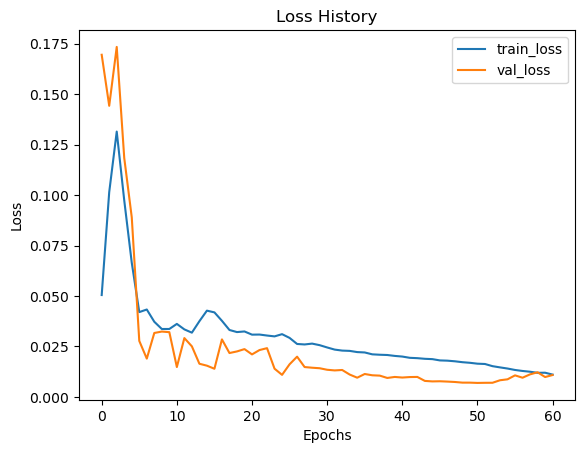

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

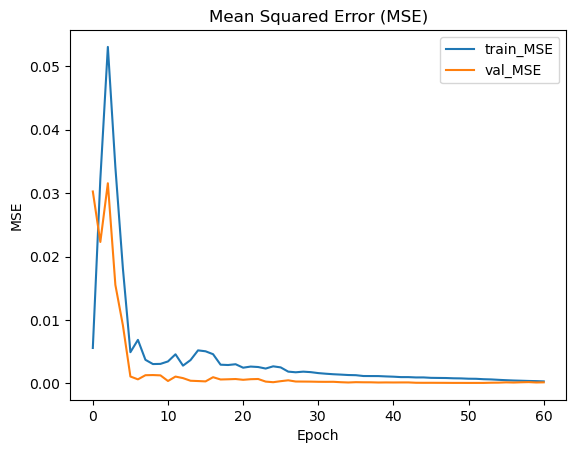

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

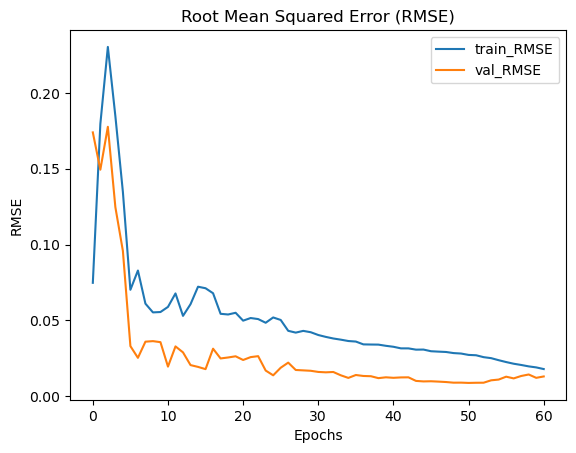

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

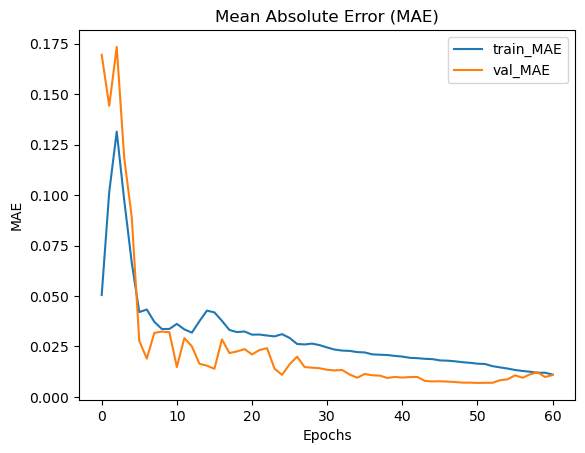

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

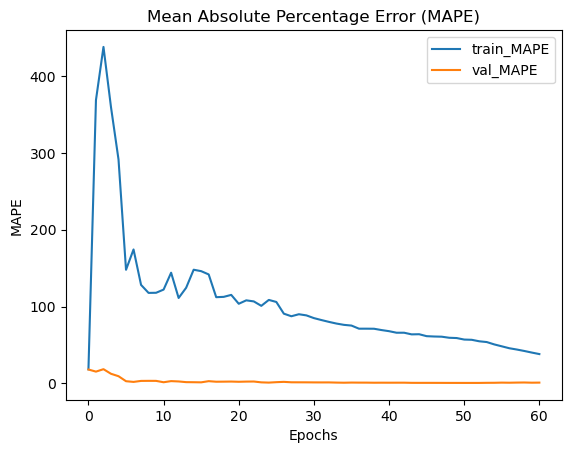

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:17:41.473760: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 5)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


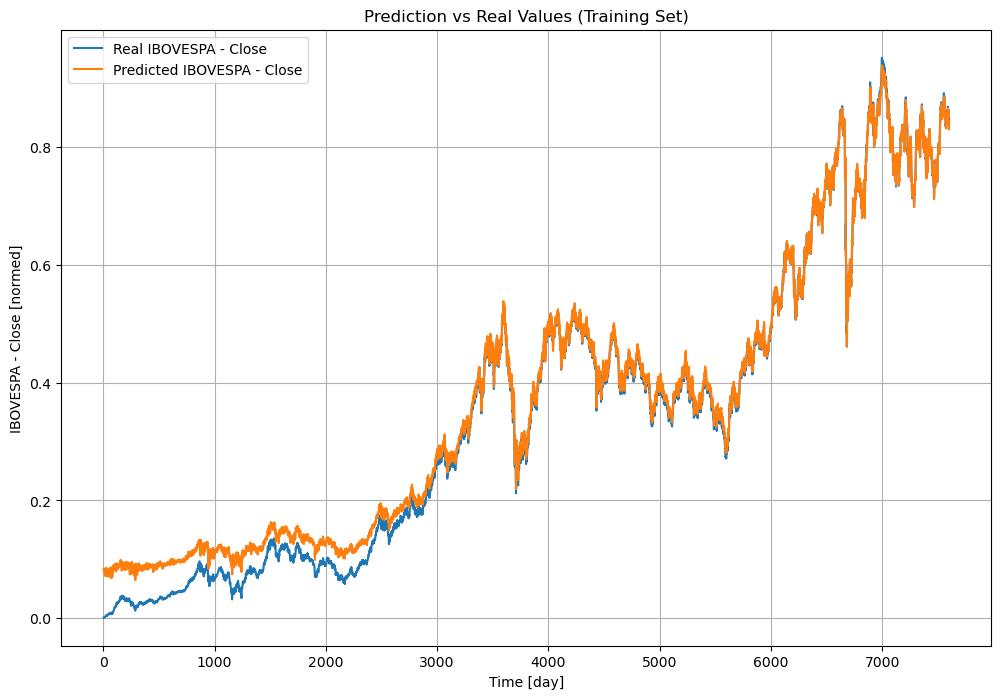

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 5)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


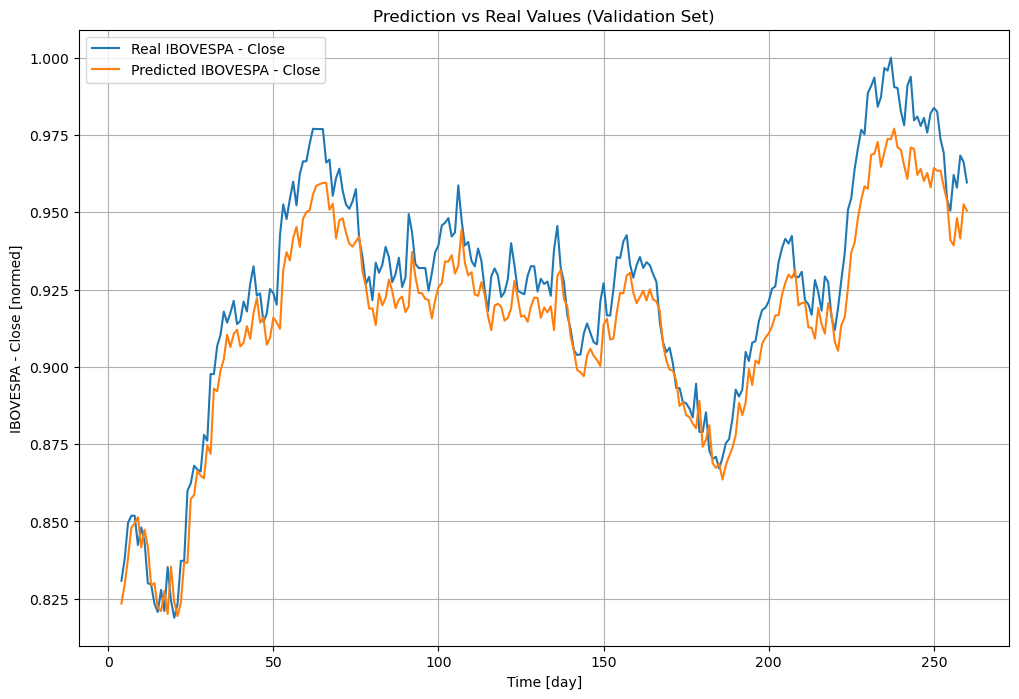

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 5)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


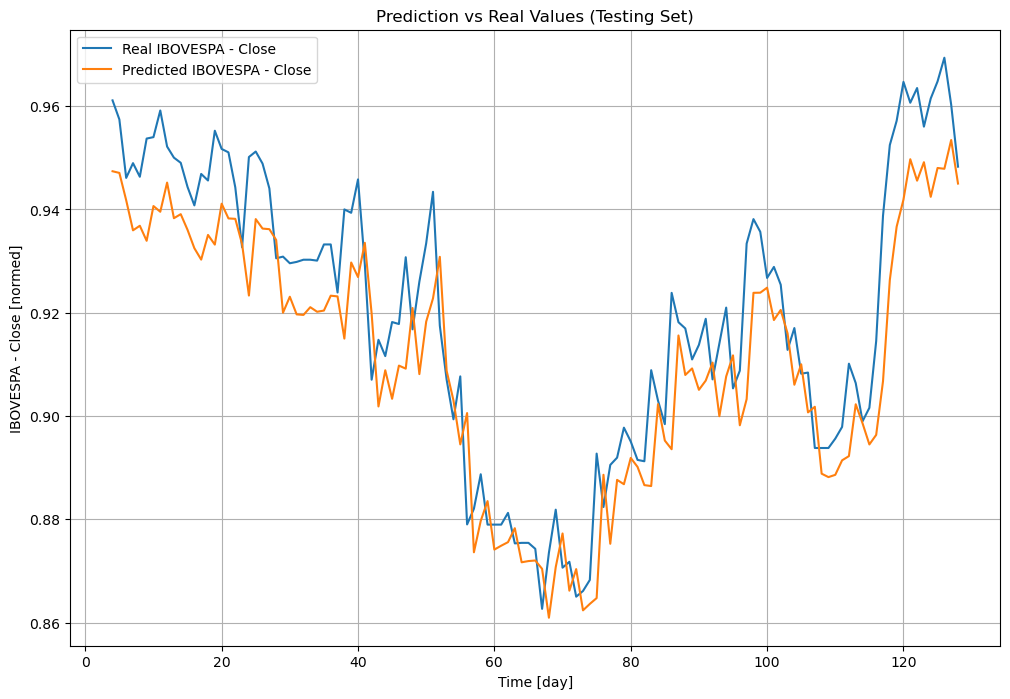

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

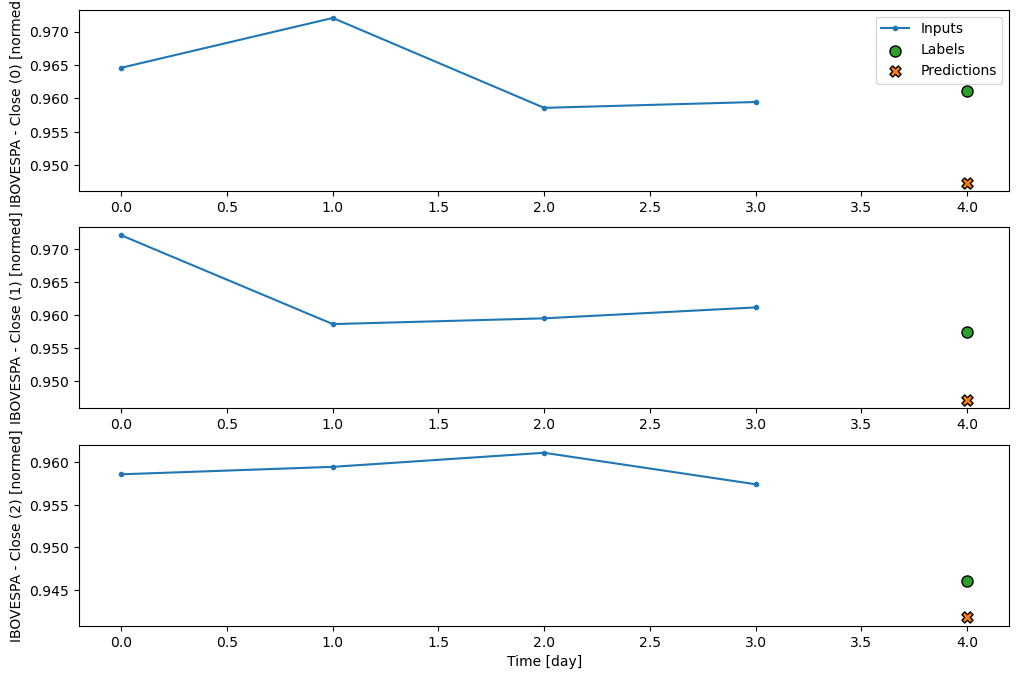

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:33s:965ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


array([[[0.9473898 , 0.9473898 , 0.9473898 , ..., 0.9473898 ,
         0.9473898 , 0.9473898 ]],

       [[0.9470678 , 0.9470678 , 0.9470678 , ..., 0.9470678 ,
         0.9470678 , 0.9470678 ]],

       [[0.94177824, 0.94177824, 0.94177824, ..., 0.94177824,
         0.94177824, 0.94177824]],

       ...,

       [[0.94786817, 0.94786817, 0.94786817, ..., 0.94786817,
         0.94786817, 0.94786817]],

       [[0.9534419 , 0.9534419 , 0.9534419 , ..., 0.9534419 ,
         0.9534419 , 0.9534419 ]],

       [[0.9450035 , 0.9450035 , 0.9450035 , ..., 0.9450035 ,
         0.9450035 , 0.9450035 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')